In [5]:
#!/usr/bin/env python3
#pip install  rioxarray==0.3.1
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import rasterio
import os
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import itertools
import argparse
import os

import regionmask


from line_profiler import LineProfiler
import pdb

In [ ]:
#pip install regionmask

Defaulting to user installation because normal site-packages is not writeable
  Using cached shapely-2.0.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.3 MB)
  Using cached numpy-1.24.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached pandas-1.5.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.5.13
    Uninstalling Shapely-1.5.13:
      Successfully uninstalled Shapely-1.5.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.6.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)
srex = regionmask.defined_regions.srex
srex
regions=  ['ALA', 'CGI', 'WNA', 'CNA', 'ENA', 'CAM', 'AMZ', 'NEB', 'WSA',
                  'SSA', 'NEU', 'CEU', 'MED', 'SAH', 'WAF', 'EAF', 'SAF', 'NAS',
                  'WAS', 'CAS', 'TIB', 'EAS', 'SAS', 'SEA', 'NAU', 'SAU']

srex[regions].plot(label='abbrev')


In [8]:
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)
ar6 = regionmask.defined_regions.ar6.land

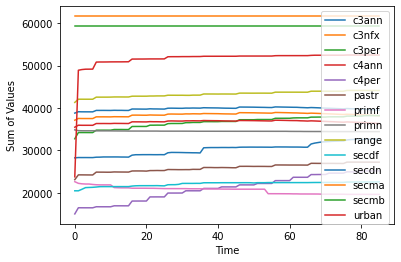

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)
variable_names = [var for var in da_landuse.data_vars.keys() if var != 'time_bnds']
# Get the time values
time = da_landuse['time'].values

# Initialize the modified land use dataset
modified_landuse = da_landuse.copy()

# Loop over the data variables and check if the fraction is larger than 0
for variable in variable_names:
    fraction = da_landuse[variable]
    modified_landuse[variable] = xr.where(fraction > 0, 1, 0)

# Calculate the sum of values for each variable
sum_over_values = modified_landuse.sum(dim=[dim for dim in modified_landuse.dims if dim != 'time'])

fig, ax = plt.subplots()

# Loop over the data variables and plot the sum of values over time
for variable in variable_names:
    values = sum_over_values[variable].values.flatten()
    ax.plot(time, values, label=variable)

# Set the x-axis label and ticks
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Sum of Values')
#ax.set_ylim(-10, 10)

# Add a legend
ax.legend()

# Display the plot
plt.show()


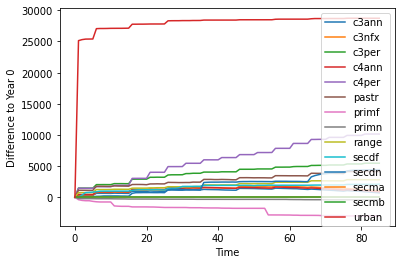

In [63]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)
variable_names = [var for var in da_landuse.data_vars.keys() if var != 'time_bnds']
# Get the time values
time = da_landuse['time'].values

# Initialize the modified land use dataset
modified_landuse = da_landuse.copy()

# Loop over the data variables and check if the fraction is larger than 0
for variable in variable_names:
    fraction = da_landuse[variable]
    modified_landuse[variable] = xr.where(fraction > 0, 1, 0)

# Calculate the sum of values for each variable
sum_over_values = modified_landuse.sum(dim=[dim for dim in modified_landuse.dims if dim != 'time'])

# Calculate the difference compared to year 0
diff_to_year0 = sum_over_values - sum_over_values.sel(time=0)

fig, ax = plt.subplots()

# Loop over the data variables and plot the difference compared to year 0
for variable in variable_names:
    values = diff_to_year0[variable].values.flatten()
    ax.plot(time, values, label=variable)

# Set the x-axis label and ticks
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Difference to Year 0')

# Add a legend
ax.legend()

# Display the plot
plt.show()


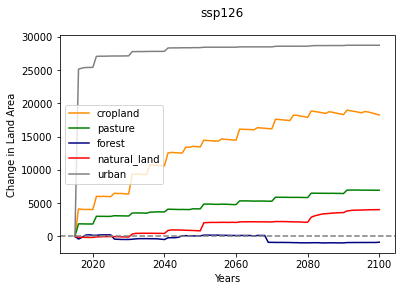

In [67]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np


category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn'],
    'urban':['urban']
}
years = np.arange(2015, 2015 + len(time))

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)
variable_names = [var for var in da_landuse.data_vars.keys() if var != 'time_bnds']
# Get the time values
time = da_landuse['time'].values

# Initialize the modified land use dataset
modified_landuse = da_landuse.copy()

# Loop over the data variables and check if the fraction is larger than 0
for variable in variable_names:
    fraction = da_landuse[variable]
    modified_landuse[variable] = xr.where(fraction > 0, 1, 0)

# Calculate the sum of values for each variable
sum_over_values = modified_landuse.sum(dim=[dim for dim in modified_landuse.dims if dim != 'time'])

# Calculate the difference compared to year 0
#diff_to_year0 = sum_over_values - sum_over_values.isel(time=0)


# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the differences for cropland category
sum_over_categories['cropland'] = sum_over_values['c3ann'] + sum_over_values['c3per'] + sum_over_values['c4ann'] + sum_over_values['c4per'] + sum_over_values['c3nfx']

# Sum the differences for pasture category
sum_over_categories['pasture'] = sum_over_values['pastr'] + sum_over_values['range']

# Sum the differences for forest category
sum_over_categories['forest'] = sum_over_values['primf'] + sum_over_values['secdf']

# Sum the differences for natural_land category
sum_over_categories['natural_land'] = sum_over_values['primn'] + sum_over_values['secdn']

sum_over_categories['urban'] = sum_over_values['urban'] 

difference = sum_over_categories - sum_over_categories.isel(time=0)


category_colors = {
    'cropland': '#FF8C00',
    'pasture': 'green',
    'forest': '#000080',
    'natural_land': 'red',
    'urban':'grey'
}


# Create a figure and axes
fig, ax = plt.subplots()

# Loop over the categories
for category in category_mapping:
    # Get the difference values for the current category
    values = difference[category].values

    # Plot the difference values for the current category with the corresponding color
    ax.plot(years, values, label=category, color=category_colors[category])

# Add a horizontal line at y=0.0
ax.axhline(y=0.0, color='grey', linestyle='--')

# Set the x-axis label and ticks
ax.set_xlabel('Years')

# Set the y-axis label
ax.set_ylabel('Change in Land Area')

# Set the y-axis limits
#ax.set_ylim(-10, 10)

# Add a legend
ax.legend()
plt.suptitle("ssp126")

# Display the plot
plt.show()

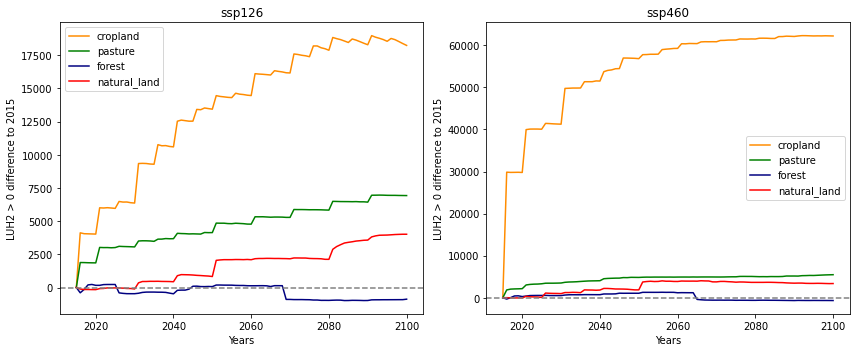

In [68]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

scenarios = ["ssp126", "ssp460"]
years = np.arange(2015, 2015 + len(time))
# Create a figure with two subplots

category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

fig, axes = plt.subplots(nrows=1, ncols=len(scenarios), figsize=(12, 5))

for i, scenario in enumerate(scenarios):
    # Load the land use dataset
    ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + scenario + ".nc"
    da_landuse = xr.open_dataset(ncfname, decode_times=False)
    variable_names = [var for var in da_landuse.data_vars.keys() if var != 'time_bnds']
    # Get the time values
    time = da_landuse['time'].values

    # Initialize the modified land use dataset
    modified_landuse = da_landuse.copy()

    # Loop over the data variables and check if the fraction is larger than 0
    for variable in variable_names:
        fraction = da_landuse[variable]
        modified_landuse[variable] = xr.where(fraction > 0, 1, 0)

    # Calculate the sum of values for each variable
    sum_over_values = modified_landuse.sum(dim=[dim for dim in modified_landuse.dims if dim != 'time'])

    # Create a new dataset for sum over categories
    sum_over_categories = xr.Dataset()

    # Sum the differences for cropland category
    sum_over_categories['cropland'] = sum_over_values['c3ann'] + sum_over_values['c3per'] + sum_over_values['c4ann'] + sum_over_values['c4per'] + sum_over_values['c3nfx']

    # Sum the differences for pasture category
    sum_over_categories['pasture'] = sum_over_values['pastr'] + sum_over_values['range']

    # Sum the differences for forest category
    sum_over_categories['forest'] = sum_over_values['primf'] + sum_over_values['secdf']

    # Sum the differences for natural_land category
    sum_over_categories['natural_land'] = sum_over_values['primn'] + sum_over_values['secdn']
    

    difference = sum_over_categories - sum_over_categories.isel(time=0)

    category_colors = {
        'cropland': '#FF8C00',
        'pasture': 'green',
        'forest': '#000080',
        'natural_land': 'red'
    }

    ax = axes[i]  # Select the current subplot

    # Loop over the categories
    for category in category_mapping:
        # Get the difference values for the current category
        values = difference[category].values

        # Plot the difference values for the current category with the corresponding color
        ax.plot(years, values, label=category, color=category_colors[category])

    # Add a horizontal line at y=0.0
    ax.axhline(y=0.0, color='grey', linestyle='--')

    # Set the x-axis label and ticks
    ax.set_xlabel('Years')

    # Set the y-axis label
    ax.set_ylabel('LUH2 > 0 difference to 2015')

    # Set the title for the subplot
    ax.set_title(scenario)

    # Add a legend
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


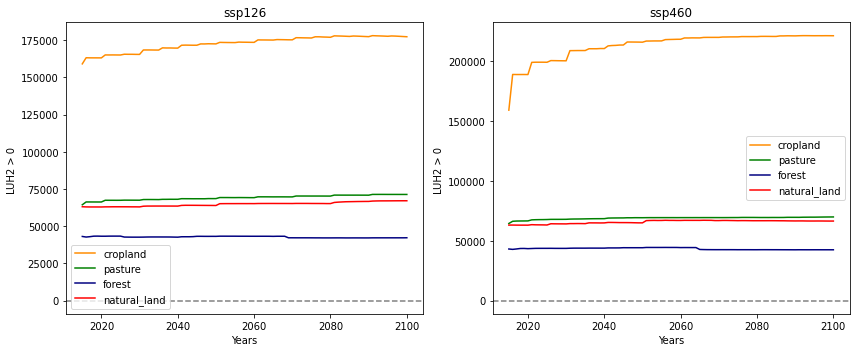

In [69]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

scenarios = ["ssp126", "ssp460"]
years = np.arange(2015, 2015 + len(time))
# Create a figure with two subplots

category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

fig, axes = plt.subplots(nrows=1, ncols=len(scenarios), figsize=(12, 5))

for i, scenario in enumerate(scenarios):
    # Load the land use dataset
    ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + scenario + ".nc"
    da_landuse = xr.open_dataset(ncfname, decode_times=False)
    variable_names = [var for var in da_landuse.data_vars.keys() if var != 'time_bnds']
    # Get the time values
    time = da_landuse['time'].values

    # Initialize the modified land use dataset
    modified_landuse = da_landuse.copy()

    # Loop over the data variables and check if the fraction is larger than 0
    for variable in variable_names:
        fraction = da_landuse[variable]
        modified_landuse[variable] = xr.where(fraction > 0, 1, 0)

    # Calculate the sum of values for each variable
    sum_over_values = modified_landuse.sum(dim=[dim for dim in modified_landuse.dims if dim != 'time'])

    # Create a new dataset for sum over categories
    sum_over_categories = xr.Dataset()

    # Sum the differences for cropland category
    sum_over_categories['cropland'] = sum_over_values['c3ann'] + sum_over_values['c3per'] + sum_over_values['c4ann'] + sum_over_values['c4per'] + sum_over_values['c3nfx']

    # Sum the differences for pasture category
    sum_over_categories['pasture'] = sum_over_values['pastr'] + sum_over_values['range']

    # Sum the differences for forest category
    sum_over_categories['forest'] = sum_over_values['primf'] + sum_over_values['secdf']

    # Sum the differences for natural_land category
    sum_over_categories['natural_land'] = sum_over_values['primn'] + sum_over_values['secdn']
    

    difference = sum_over_categories 
    category_colors = {
        'cropland': '#FF8C00',
        'pasture': 'green',
        'forest': '#000080',
        'natural_land': 'red'
    }

    ax = axes[i]  # Select the current subplot

    # Loop over the categories
    for category in category_mapping:
        # Get the difference values for the current category
        values = difference[category].values

        # Plot the difference values for the current category with the corresponding color
        ax.plot(years, values, label=category, color=category_colors[category])

    # Add a horizontal line at y=0.0
    ax.axhline(y=0.0, color='grey', linestyle='--')

    # Set the x-axis label and ticks
    ax.set_xlabel('Years')

    # Set the y-axis label
    ax.set_ylabel('LUH2 > 0 ')

    # Set the title for the subplot
    ax.set_title(scenario)

    # Add a legend
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


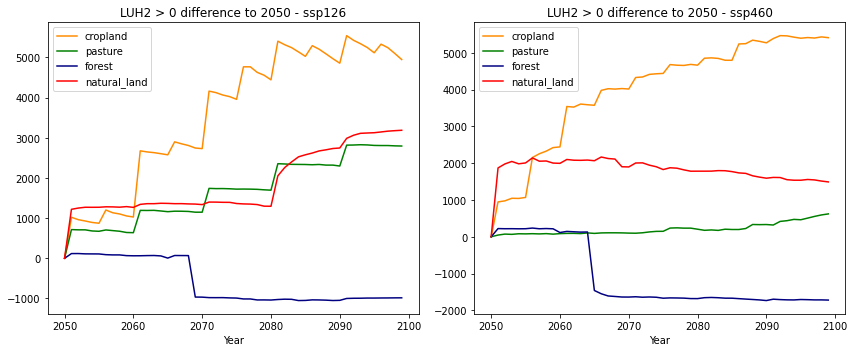

In [63]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

scenarios = ["ssp126", "ssp460"]
years = np.arange(2050, 2100)  # Years range from 2050 to 2100

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=len(scenarios), figsize=(12, 5))

# Define the category mapping for assigning colors
category_mapping = {
    'cropland': '#FF8C00',
    'pasture': 'green',
    'forest': '#000080',
    'natural_land': 'red'
}

for i, scenario in enumerate(scenarios):
    # Load the land use dataset
    ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + scenario + ".nc"
    da_landuse = xr.open_dataset(ncfname, decode_times=False)
    variable_names = [var for var in da_landuse.data_vars.keys() if var != 'time_bnds']
    # Get the time values
    time = da_landuse['time'].values

    # Initialize the modified land use dataset
    modified_landuse = da_landuse.copy()

    # Loop over the data variables and check if the fraction is larger than 0
    for variable in variable_names:
        fraction = da_landuse[variable]
        modified_landuse[variable] = xr.where(fraction > 0, 1, 0)

    # Calculate the sum of values for each variable
    sum_over_values = modified_landuse.sum(dim=[dim for dim in modified_landuse.dims if dim != 'time'])

    # Create a new dataset for sum over categories
    sum_over_categories = xr.Dataset()

    # Sum the differences for cropland category
    sum_over_categories['cropland'] = sum_over_values['c3ann'] + sum_over_values['c3per'] + sum_over_values['c4ann'] + sum_over_values['c4per'] + sum_over_values['c3nfx']

    # Sum the differences for pasture category
    sum_over_categories['pasture'] = sum_over_values['pastr'] + sum_over_values['range']

    # Sum the differences for forest category
    sum_over_categories['forest'] = sum_over_values['primf'] + sum_over_values['secdf']

    # Sum the differences for natural_land category
    sum_over_categories['natural_land'] = sum_over_values['primn'] + sum_over_values['secdn']

    difference = sum_over_categories - sum_over_categories.isel(time=35)

    ax = axes[i]  # Select the current subplot

    # Loop over the categories and plot differences
    for category in category_mapping:
        # Get the difference values for the current category
        values = difference[category].isel(time=slice(35, 85))

        # Plot the difference values for the current category with the corresponding color
        ax.plot(years, values, label=category, color=category_mapping[category])

    # Set the x-axis label and title for the current subplot
    ax.set_xlabel('Year')
    ax.set_title('LUH2 > 0 difference to 2050 - ' + scenario)

    # Add a legend for the current subplot
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


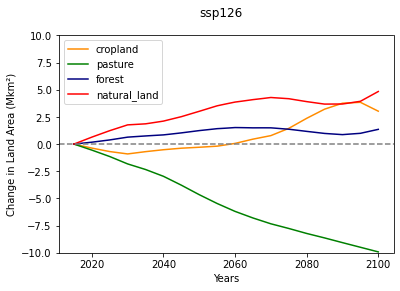

In [75]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)

# Define the category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Get the time values
time = da_landuse['time'].values
years = np.arange(2015, 2015 + len(time))


# Calculate the area per grid cell (km²)
lat_rad = np.deg2rad(da_landuse['lat'])
lon_rad = np.deg2rad(da_landuse['lon'])
radius_earth_km = 6371  # Earth's radius in kilometers

grid_cell_area_km2 = (
    2 * np.pi * (radius_earth_km ** 2) *
    (np.cos(lat_rad) * 0.25 * np.pi / 180) *  # Latitude cell size in radians
    (0.25 * np.pi / 180)  # Longitude cell size in radians
)


# Initialize the modified land use dataset
modified_landuse = da_landuse.copy()

# Loop over the data variables and convert the values to Mkm²
for variable in da_landuse.data_vars:
    modified_landuse[variable] = da_landuse[variable] * grid_cell_area_km2 / 1e6  # Convert to Mkm²

# Calculate the sum of values for each variable
sum_over_values = modified_landuse.sum(dim=[dim for dim in modified_landuse.dims if dim != 'time'])

# Calculate the difference to Year 0 for each variable
#difference = sum_over_values - sum_over_values.isel(time=0)

# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the differences for cropland category
sum_over_categories['cropland'] = sum_over_values['c3ann'] + sum_over_values['c3per'] + sum_over_values['c4ann'] + sum_over_values['c4per'] + sum_over_values['c3nfx']

# Sum the differences for pasture category
sum_over_categories['pasture'] = sum_over_values['pastr'] + sum_over_values['range']

# Sum the differences for forest category
sum_over_categories['forest'] = sum_over_values['primf'] + sum_over_values['secdf']

# Sum the differences for natural_land category
sum_over_categories['natural_land'] = sum_over_values['primn'] + sum_over_values['secdn']

# Calculate the difference to Year 0 for each category
difference = sum_over_categories - sum_over_categories.isel(time=0)

category_colors = {
    'cropland': '#FF8C00',
    'pasture': 'green',
    'forest': '#000080',
    'natural_land': 'red'
}


# Create a figure and axes
fig, ax = plt.subplots()

# Loop over the categories
for category in category_mapping:
    # Get the difference values for the current category
    values = difference[category].values

    # Plot the difference values for the current category with the corresponding color
    ax.plot(years, values, label=category, color=category_colors[category])

# Add a horizontal line at y=0.0
ax.axhline(y=0.0, color='grey', linestyle='--')

# Set the x-axis label and ticks
ax.set_xlabel('Years')

# Set the y-axis label
ax.set_ylabel('Change in Land Area (Mkm²)')

# Set the y-axis limits
ax.set_ylim(-10, 10)

# Add a legend
ax.legend()
plt.suptitle("ssp126")

# Display the plot
plt.show()


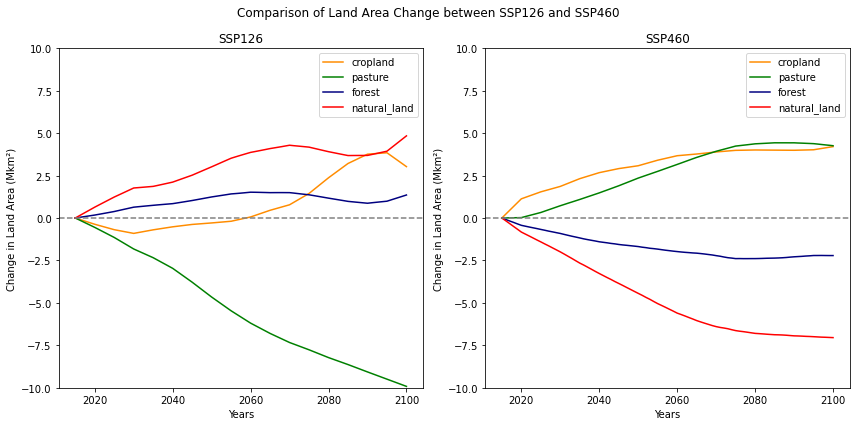

In [76]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Load the land use datasets for SSP126 and SSP460
ncfname_ssp126 = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"
ncfname_ssp460 = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp460.nc"
da_landuse_ssp126 = xr.open_dataset(ncfname_ssp126, decode_times=False)
da_landuse_ssp460 = xr.open_dataset(ncfname_ssp460, decode_times=False)

# Define the category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Get the time values
time_ssp126 = da_landuse_ssp126['time'].values
time_ssp460 = da_landuse_ssp460['time'].values
years_ssp126 = np.arange(2015, 2015 + len(time_ssp126))
years_ssp460 = np.arange(2015, 2015 + len(time_ssp460))

# Calculate the area per grid cell (km²)
lat_rad = np.deg2rad(da_landuse_ssp126['lat'])
lon_rad = np.deg2rad(da_landuse_ssp126['lon'])
radius_earth_km = 6371  # Earth's radius in kilometers

grid_cell_area_km2 = (
    2 * np.pi * (radius_earth_km ** 2) *
    (np.cos(lat_rad) * 0.25 * np.pi / 180) *  # Latitude cell size in radians
    (0.25 * np.pi / 180)  # Longitude cell size in radians
)


# Initialize the modified land use datasets
modified_landuse_ssp126 = da_landuse_ssp126.copy()
modified_landuse_ssp460 = da_landuse_ssp460.copy()

# Loop over the data variables and convert the values to Mkm² for SSP126
for variable in da_landuse_ssp126.data_vars:
    modified_landuse_ssp126[variable] = da_landuse_ssp126[variable] * grid_cell_area_km2 / 1e6  # Convert to Mkm²

# Loop over the data variables and convert the values to Mkm² for SSP460
for variable in da_landuse_ssp460.data_vars:
    modified_landuse_ssp460[variable] = da_landuse_ssp460[variable] * grid_cell_area_km2 / 1e6  # Convert to Mkm²

# Calculate the sum of values for each variable for SSP126
sum_over_values_ssp126 = modified_landuse_ssp126.sum(dim=[dim for dim in modified_landuse_ssp126.dims if dim != 'time'])

# Calculate the sum of values for each variable for SSP460
sum_over_values_ssp460 = modified_landuse_ssp460.sum(dim=[dim for dim in modified_landuse_ssp460.dims if dim != 'time'])

# Calculate the difference to Year 0 for each variable for SSP126
difference_ssp126 = sum_over_values_ssp126 - sum_over_values_ssp126.isel(time=0)

# Create a new dataset for sum over categories for SSP126
sum_over_categories_ssp126 = xr.Dataset()

# Sum the differences for cropland category for SSP126
sum_over_categories_ssp126['cropland'] = sum_over_values_ssp126['c3ann'] + sum_over_values_ssp126['c3per'] + sum_over_values_ssp126['c4ann'] + sum_over_values_ssp126['c4per'] + sum_over_values_ssp126['c3nfx']

# Sum the differences for pasture category for SSP126
sum_over_categories_ssp126['pasture'] = sum_over_values_ssp126['pastr'] + sum_over_values_ssp126['range']

# Sum the differences for forest category for SSP126
sum_over_categories_ssp126['forest'] = sum_over_values_ssp126['primf'] + sum_over_values_ssp126['secdf']

# Sum the differences for natural_land category for SSP126
sum_over_categories_ssp126['natural_land'] = sum_over_values_ssp126['primn'] + sum_over_values_ssp126['secdn']

# Calculate the difference to Year 0 for each category for SSP126
difference_ssp126 = sum_over_categories_ssp126 - sum_over_categories_ssp126.isel(time=0)


# Calculate the sum of values for each variable for SSP460
sum_over_values_ssp460 = modified_landuse_ssp460.sum(dim=[dim for dim in modified_landuse_ssp460.dims if dim != 'time'])

# Create a new dataset for sum over categories for SSP460
sum_over_categories_ssp460 = xr.Dataset()

# Sum the differences for cropland category for SSP460
sum_over_categories_ssp460['cropland'] = sum_over_values_ssp460['c3ann'] + sum_over_values_ssp460['c3per'] + sum_over_values_ssp460['c4ann'] + sum_over_values_ssp460['c4per'] + sum_over_values_ssp460['c3nfx']

# Sum the differences for pasture category for SSP460
sum_over_categories_ssp460['pasture'] = sum_over_values_ssp460['pastr'] + sum_over_values_ssp460['range']

# Sum the differences for forest category for SSP460
sum_over_categories_ssp460['forest'] = sum_over_values_ssp460['primf'] + sum_over_values_ssp460['secdf']

# Sum the differences for natural_land category for SSP460
sum_over_categories_ssp460['natural_land'] = sum_over_values_ssp460['primn'] + sum_over_values_ssp460['secdn']

# Calculate the difference to Year 0 for each category for SSP460
difference_ssp460 = sum_over_categories_ssp460 - sum_over_categories_ssp460.isel(time=0)


# Set the category colors
category_colors = {
    'cropland': '#FF8C00',
    'pasture': 'green',
    'forest': '#000080',
    'natural_land': 'red'
}


# Create a figure and axes for SSP126
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot SSP126 data
for category in category_mapping:
    values_ssp126 = difference_ssp126[category].values
    ax1.plot(years_ssp126, values_ssp126, label=category, color=category_colors[category])

ax1.axhline(y=0.0, color='grey', linestyle='--')
ax1.set_xlabel('Years')
ax1.set_ylabel('Change in Land Area (Mkm²)')
ax1.set_ylim(-10, 10)
ax1.legend()
ax1.set_title("SSP126")


# Plot SSP460 data
for category in category_mapping:
    values_ssp460 = difference_ssp460[category].values
    ax2.plot(years_ssp460, values_ssp460, label=category, color=category_colors[category])

ax2.axhline(y=0.0, color='grey', linestyle='--')
ax2.set_xlabel('Years')
ax2.set_ylabel('Change in Land Area (Mkm²)')
ax2.set_ylim(-10, 10)
ax2.legend()
ax2.set_title("SSP460")


# Add a suptitle
fig.suptitle("Comparison of Land Area Change between SSP126 and SSP460")

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

region_abbrevs = ['WAF', 'EAF', 'SAF']

# Load the land use dataset for the specified regions
regions = [region_abbrevs.index(region)+1 for region in region_abbrevs]
num_regions = len(regions)
variable_names = [var for var in da_landuse.data_vars.keys() if var != 'time_bnds']
num_variables = len(variable_names)
fig, axes = plt.subplots(nrows=num_variables, ncols=num_regions, figsize=(4*num_regions, 4*num_variables))

for i, region_number in enumerate(regions):
    # Load the land use dataset
    da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126_region{region_number}.nc", decode_times=False)
    # Get the time values
    time = da_landuse['time'].values
    
    # Initialize the modified land use dataset
    modified_landuse = da_landuse.copy()

    # Loop over the data variables and check if the fraction is larger than 0
    for variable in variable_names:
        fraction = da_landuse[variable]
        modified_landuse[variable] = xr.where(fraction > 0, 1, 0)

    # Calculate the sum of values for each variable
    sum_over_values = modified_landuse.sum(dim=[dim for dim in modified_landuse.dims if dim != 'time'])

    # Loop over the variables
    for j, variable in enumerate(variable_names):
        # Get the difference values for the current variable
        values = sum_over_values[variable].values

        # Plot the difference values for the current variable in the corresponding subplot
        ax = axes[j, i]
        ax.plot(time, values, label=variable)

        # Set the y-axis label for the leftmost subplots
        if i == 0:
            ax.set_ylabel('Sum of gridcells')

        # Add a horizontal line at y=0.0
        ax.axhline(y=0.0, color='grey', linestyle='--')

        # Set the title with region number and variable name
        region_name = region_abbrevs[region_number-1]
        ax.set_title(f'ssp126 Region {region_name} - {variable}')

        # Add a legend to the last column subplots
        if i == num_regions - 1:
            ax.legend()

    # Set the x-axis label for the bottom subplots
    if i == num_regions - 1:
        axes[-1, i].set_xlabel('Years')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# Load the land use dataset
da_landuse = xr.open_dataset(f"/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc", decode_times=False)
variable_names = [var for var in da_landuse.data_vars.keys() if var != 'time_bnds']
num_variables = len(variable_names)
num_timesteps = len(da_landuse.time)

fig, axes = plt.subplots(nrows=num_variables, ncols=num_timesteps, figsize=(4*num_timesteps, 4*num_variables))

for i, variable in enumerate(variable_names):
    for j, timestep in enumerate(da_landuse.time):
        ax = axes[i, j]
        data = da_landuse[variable].isel(time=j)
        
        # Plot the data
        data.plot.imshow(ax=ax, cmap='viridis')
        
        # Set the title with variable name and timestep
        ax.set_title(f'ssp126 Africa - {variable} - {timestep}')
        
        # Remove x-axis and y-axis labels for inner subplots
        if i != num_variables - 1:
            ax.set_xlabel('')
        if j != 0:
            ax.set_ylabel('')

# Add x-axis and y-axis labels for outer subplots
for ax in axes[-1, :]:
    ax.set_xlabel('Longitude')
for ax in axes[:, 0]:
    ax.set_ylabel('Latitude')

# Adjust the layout to display plots neatly
plt.tight_layout()

# Display the plots
plt.show()


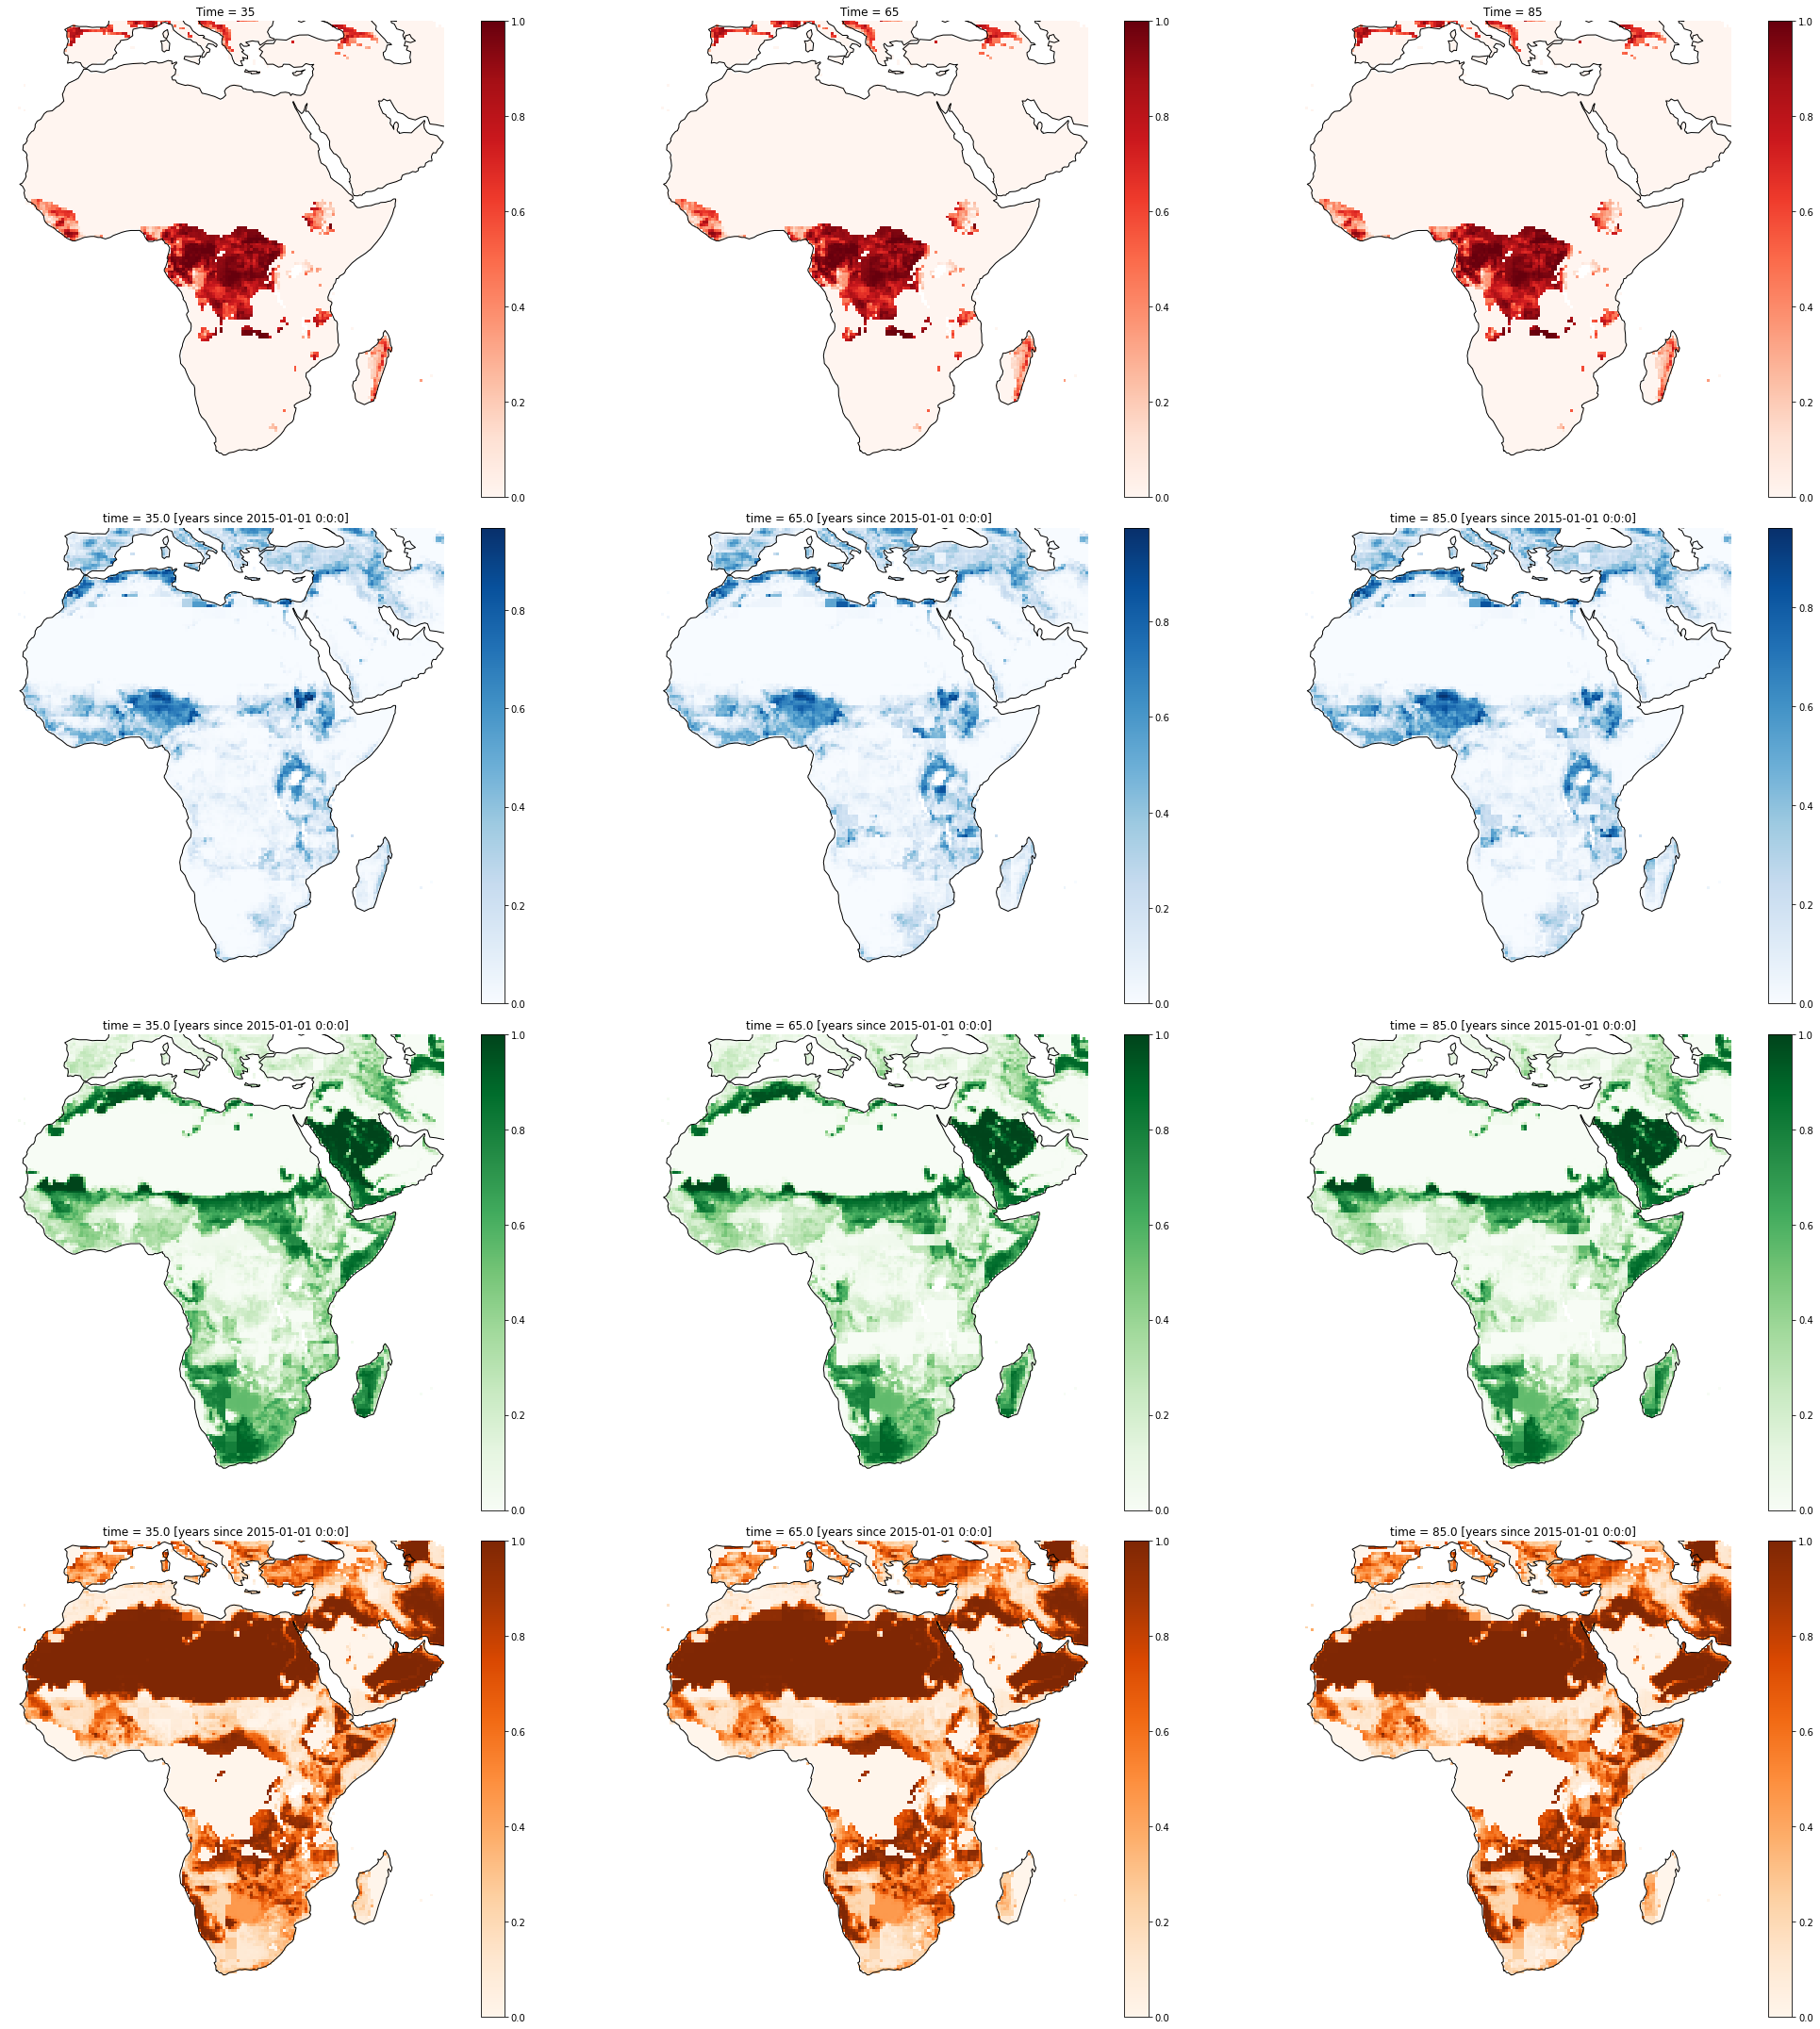

In [76]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)
 
da_historic = xr.open_dataset("/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc", decode_times=False)
da_historic = da_historic.isel(time=1146)

# Create a figure with 4 rows and 3 columns of subplots
fig, axs = plt.subplots(4, 3, figsize=(30,30), subplot_kw={'projection': ccrs.PlateCarree()})

# Loop over the 3 time slices
for i, time in enumerate([35, 65, 85]):
    # Subset the dataset for the current time
    da_landuse_t = da_landuse.isel(time=time)

    # Calculate the category sums for the current time
    forest = da_landuse_t['primf'] + da_landuse_t['secdf'] 
    cropland = da_landuse_t['c3ann'] + da_landuse_t['c3per'] + da_landuse_t['c4ann'] + da_landuse_t['c4per'] + da_landuse_t['c3nfx']
    pasture = da_landuse_t['pastr'] + da_landuse_t['range']
    natural_land = da_landuse_t['primn'] + da_landuse_t['secdn']

    # Plot each category on a different subplot in the current column
    forest.plot(ax=axs[0, i], transform=ccrs.PlateCarree(), cmap='Reds')
    cropland.plot(ax=axs[1, i], transform=ccrs.PlateCarree(), cmap='Blues')
    pasture.plot(ax=axs[2, i], transform=ccrs.PlateCarree(), cmap='Greens')
    natural_land.plot(ax=axs[3, i], transform=ccrs.PlateCarree(), cmap='Oranges')

    # Set the column title for the current time
    axs[0, i].set_title('Time = {}'.format(time))

# Set row titles for each category
axs[0, 0].set_ylabel('Forest')
axs[1, 0].set_ylabel('Cropland')
axs[2, 0].set_ylabel('Pasture')
axs[3, 0].set_ylabel('Natural Land')

# Hide axes and set extent for each subplot
for ax_row in axs:
    for ax in ax_row:
        ax.axis('off')
        ax.set_extent([-20, 60, -35, 37])
        ax.coastlines()

plt.tight_layout()
plt.show()


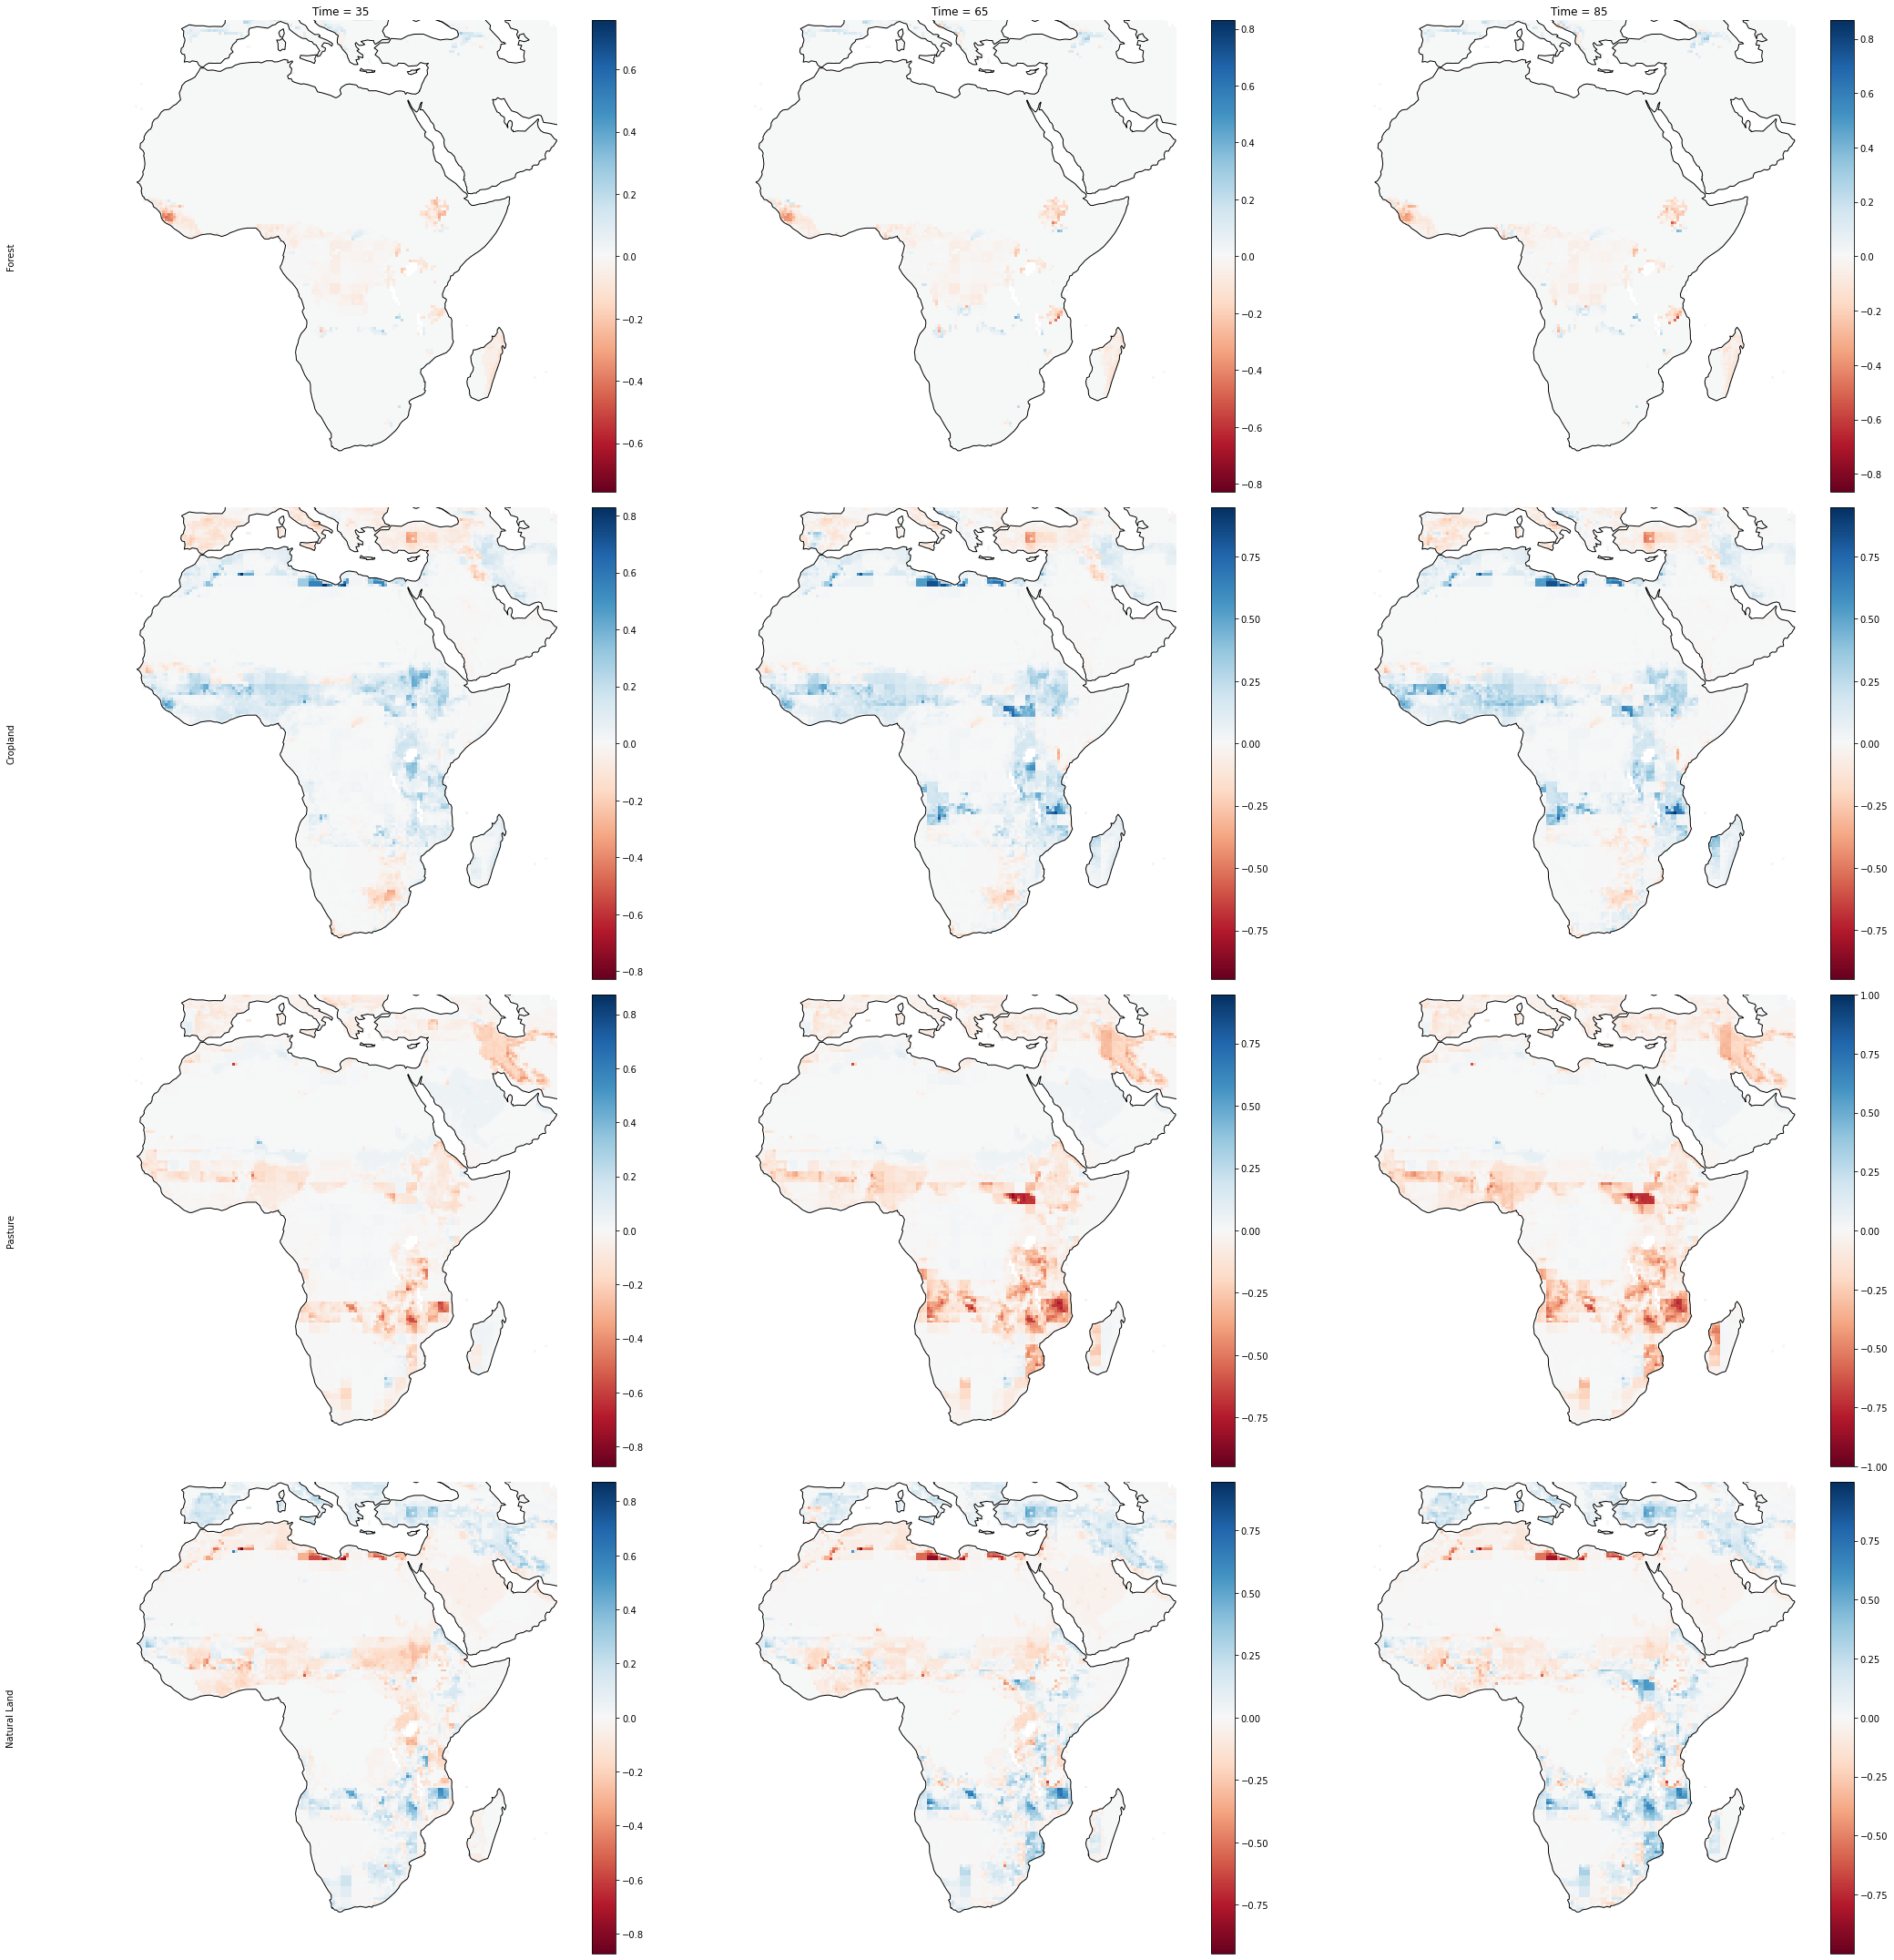

In [81]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap

# Load the land use datasets
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)
da_historic = xr.open_dataset("/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_historical.nc", decode_times=False)

# Subset the historic dataset for time=1146
da_historic = da_historic.isel(time=1146)

# Calculate the historic category sums
forest_historic = da_historic['primf'] + da_historic['secdf']
cropland_historic = da_historic['c3ann'] + da_historic['c3per'] + da_historic['c4ann'] + da_historic['c4per'] + da_historic['c3nfx']
pasture_historic = da_historic['pastr'] + da_historic['range']
natural_land_historic = da_historic['primn'] + da_historic['secdn']

# Create a figure with 4 rows and 3 columns of subplots
fig, axs = plt.subplots(4, 3, figsize=(30,30), subplot_kw={'projection': ccrs.PlateCarree()})

# Loop over the 3 time slices
for i, time in enumerate([35, 65, 85]):
    # Subset the dataset for the current time
    da_landuse_t = da_landuse.isel(time=time)

    # Calculate the category sums for the current time
    forest = da_landuse_t['primf'] + da_landuse_t['secdf'] - forest_historic
    cropland = da_landuse_t['c3ann'] + da_landuse_t['c3per'] + da_landuse_t['c4ann'] + da_landuse_t['c4per'] + da_landuse_t['c3nfx'] - cropland_historic
    pasture = da_landuse_t['pastr'] + da_landuse_t['range'] - pasture_historic
    natural_land = da_landuse_t['primn'] + da_landuse_t['secdn'] - natural_land_historic

    # Plot each category on a different subplot in the current column
    forest.plot(ax=axs[0, i], transform=ccrs.PlateCarree(), cmap='RdBu')
    cropland.plot(ax=axs[1, i], transform=ccrs.PlateCarree(), cmap='RdBu')
    pasture.plot(ax=axs[2, i], transform=ccrs.PlateCarree(), cmap='RdBu')
    natural_land.plot(ax=axs[3, i], transform=ccrs.PlateCarree(), cmap='RdBu')

    # Set the column title for the current time
    axs[0, i].set_title('Time = {}'.format(time))

# Set labels for each category
labels = ['Forest', 'Cropland', 'Pasture', 'Natural Land']
for ax, label in zip(axs[:,0], labels):
    ax.text(-0.25, 0.5, label, va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',
            transform=ax.transAxes)

# Hide axes and set extent for each subplot
for ax_row in axs:
    for ax in ax_row:
        ax.axis('off')
        ax.set_extent([-20, 60, -35, 37])
        ax.coastlines()

plt.tight_layout()
plt.show()


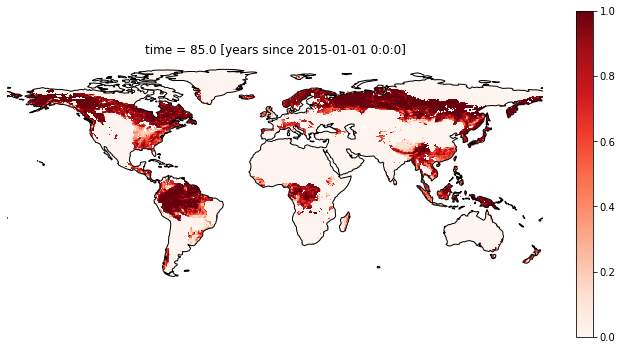

In [77]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)

# Subset the dataset for time=35 (year 2050)
da_landuse_2050 = da_landuse.isel(time=85)

# Combine all variables along a new dimension and then sum along that dimension
forest = da_landuse_2050['primf'] + da_landuse_2050['secdf'] 

# Sum the differences for cropland category
cropland = da_landuse_2050['c3ann'] + da_landuse_2050['c3per'] + da_landuse_2050['c4ann'] + da_landuse_2050['c4per'] + da_landuse_2050['c3nfx']

# Sum the differences for pasture category
pasture = da_landuse_2050['pastr'] + da_landuse_2050['range']

# Sum the differences for natural_land category
natural_land = da_landuse_2050['primn'] + da_landuse_2050['secdn']


import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a figure and axes with a cartographic projection
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the sum of all variables from da_landuse_2050
forest.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds')
ax.axis('off')
ax.set_extent((-180,180,-63,90))

# Add coastlines and gridlines
ax.coastlines()


plt.show()



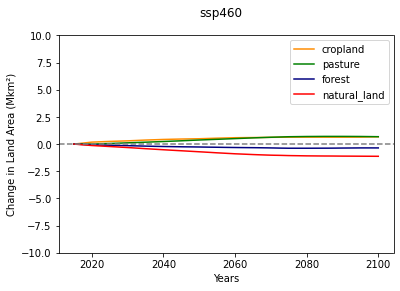

In [42]:

import xarray as xr
import numpy as np

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp460" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)

# Define the category mapping
category_mapping = {
    'cropland': ['c3ann', 'c3per', 'c4ann', 'c4per', 'c3nfx'],
    'pasture': ['pastr', 'range'],
    'forest': ['primf', 'secdf'],
    'natural_land': ['primn', 'secdn']
}

# Get the time values
time = da_landuse['time'].values
years = np.arange(2015, 2015 + len(time))


# Calculate the area per grid cell (Mkm²)
grid_cell_area_km2 = (111.32 * 0.25) * (111.32 * 0.25) * np.cos(np.deg2rad(da_landuse['lat']))

# Initialize the modified land use dataset
modified_landuse = da_landuse.copy()

# Loop over the data variables and convert the values to Mkm²
for variable in da_landuse.data_vars:
    modified_landuse[variable] = da_landuse[variable] * grid_cell_area_km2 / 1e6  # Convert to Mkm²

# Calculate the sum of values for each variable
sum_over_values = modified_landuse.sum(dim=[dim for dim in modified_landuse.dims if dim != 'time'])

# Calculate the difference to Year 0 for each variable
difference = sum_over_values - sum_over_values.isel(time=0)

# Create a new dataset for sum over categories
sum_over_categories = xr.Dataset()

# Sum the differences for cropland category
sum_over_categories['cropland'] = difference['c3ann'] + difference['c3per'] + difference['c4ann'] + difference['c4per'] + difference['c3nfx']

# Sum the differences for pasture category
sum_over_categories['pasture'] = difference['pastr'] + difference['range']

# Sum the differences for forest category
sum_over_categories['forest'] = difference['primf'] + difference['secdf']

# Sum the differences for natural_land category
sum_over_categories['natural_land'] = difference['primn'] + difference['secdn']

# Calculate the difference to Year 0 for each category
difference = sum_over_categories - sum_over_categories.isel(time=0)

# Define the colors for each category
category_colors = {
    'cropland': '#FF8C00',
    'pasture': 'green',
    'forest': '#000080',
    'natural_land': 'red'
}


# Create a figure and axes
fig, ax = plt.subplots()

# Loop over the categories
for category in category_mapping:
    # Get the difference values for the current category
    values = difference[category].values

    # Plot the difference values for the current category with the corresponding color
    ax.plot(years, values, label=category, color=category_colors[category])

# Add a horizontal line at y=0.0
ax.axhline(y=0.0, color='grey', linestyle='--')

# Set the x-axis label and ticks
ax.set_xlabel('Years')

# Set the y-axis label
ax.set_ylabel('Change in Land Area (Mkm²)')

# Set the y-axis limits
ax.set_ylim(-10, 10)

# Add a legend
ax.legend()
plt.suptitle("ssp460")

# Display the plot
plt.show()


/scratch/local/54558292/ipykernel_101037/2767458183.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Reds')


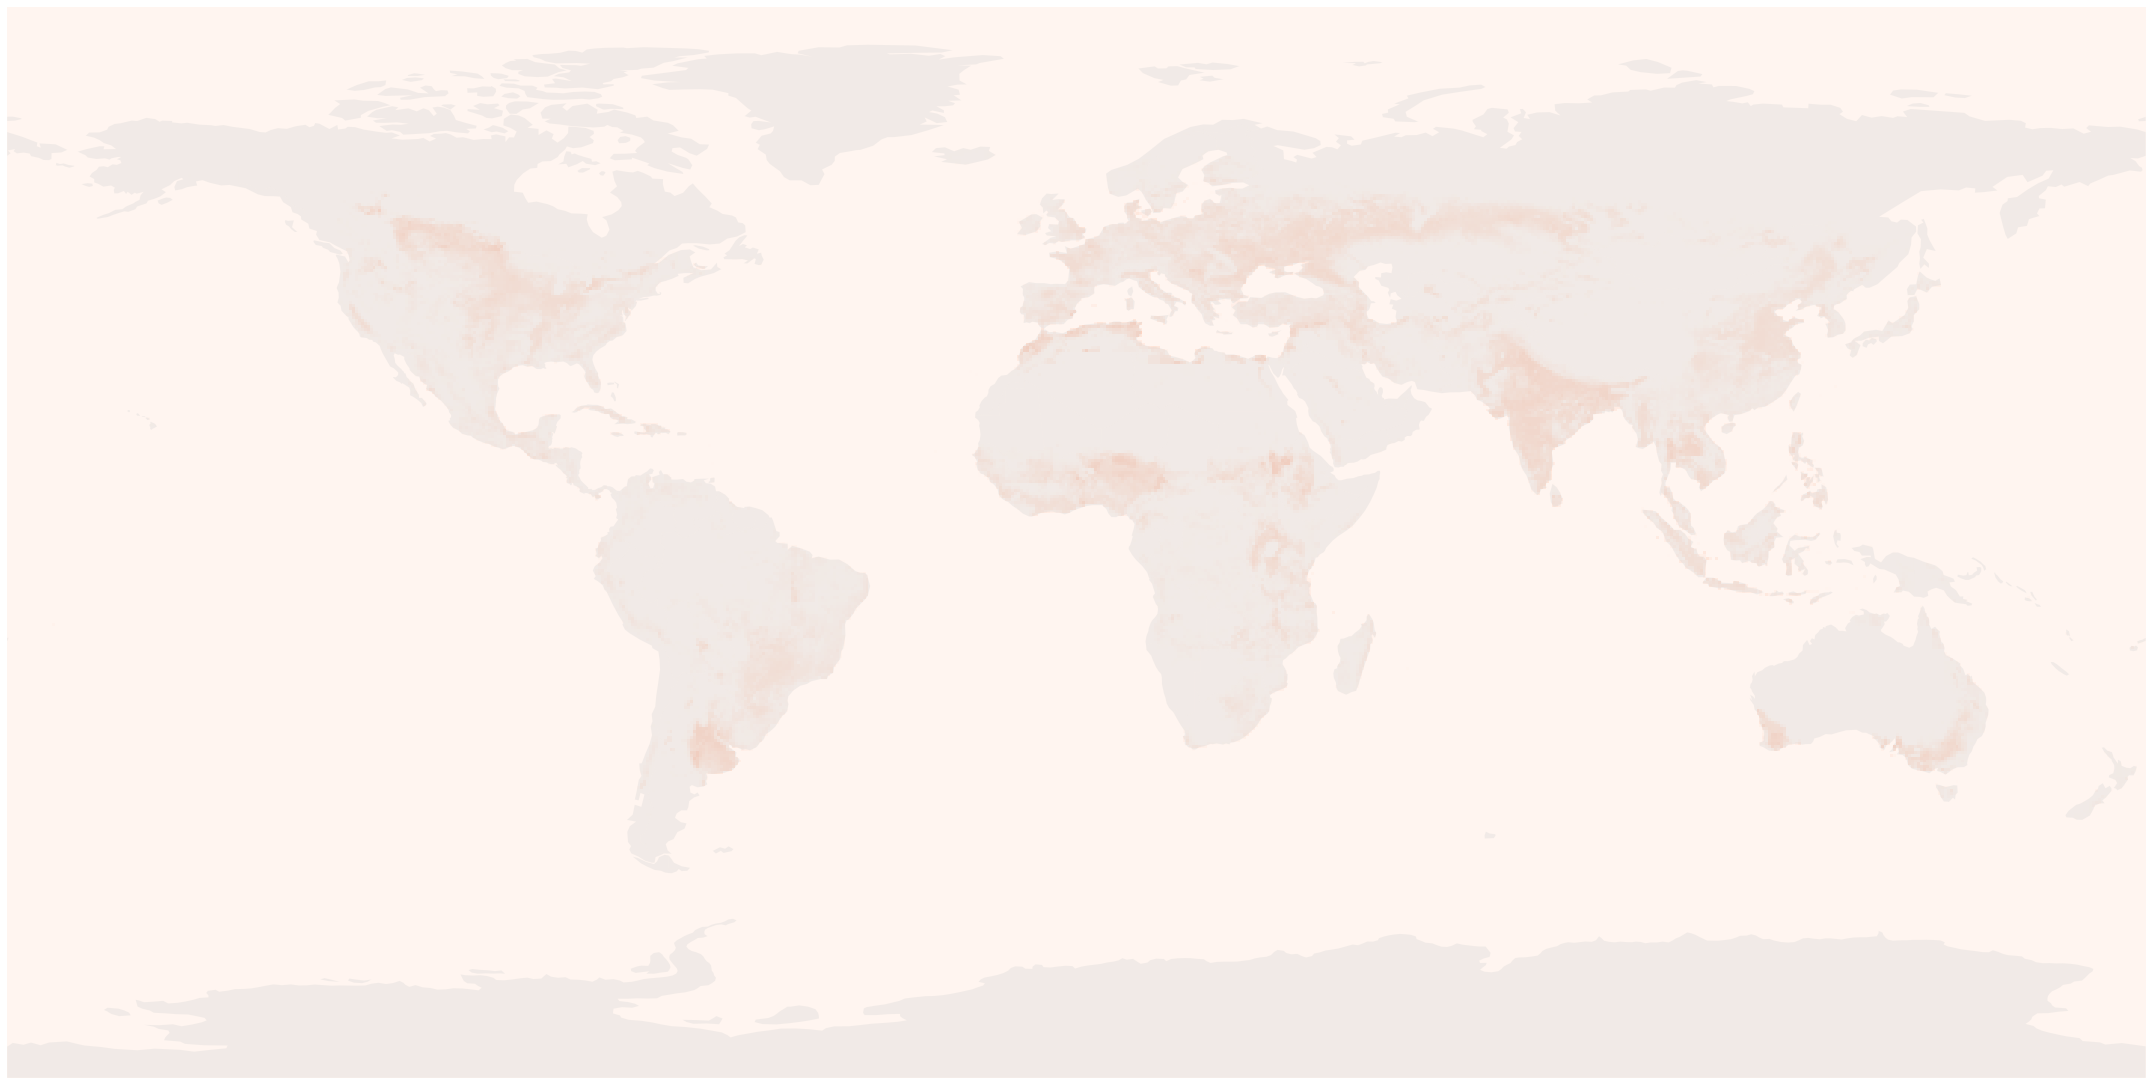

In [59]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
from matplotlib.colors import ListedColormap
import cartopy.feature as cfeature

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)

# Subset the dataset for time=35 (year 2050)
da_landuse_2050 = da_landuse.isel(time=35)

# Create a new variable for the sum of c3ann, c3nfx, c3per, c4ann, and c4per
sum_variable = da_landuse_2050['c3ann'] + da_landuse_2050['c3nfx'] + da_landuse_2050['c3per'] + da_landuse_2050['c4ann'] + da_landuse_2050['c4per']
sum_variable =sum_variable.where(sum_variable > 0, 0)

fig, ax1 = plt.subplots(
    nrows=1, ncols=1, figsize=(30, 26),
    subplot_kw={'projection': ccrs.PlateCarree()},
    tight_layout=True
)

cmap = get_cmap('Reds')
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Plot the sum_variable
im = ax1.pcolormesh(
    da_landuse_2050['lon'].values, da_landuse_2050['lat'].values, sum_variable.values,
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=5  # Adjust vmin and vmax as needed
)

countries.plot(ax=ax1, color="lightgrey", zorder=1, alpha=0.3)
ax1.axis('off')



plt.show()


/scratch/local/54558292/ipykernel_101037/3949931705.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Reds')


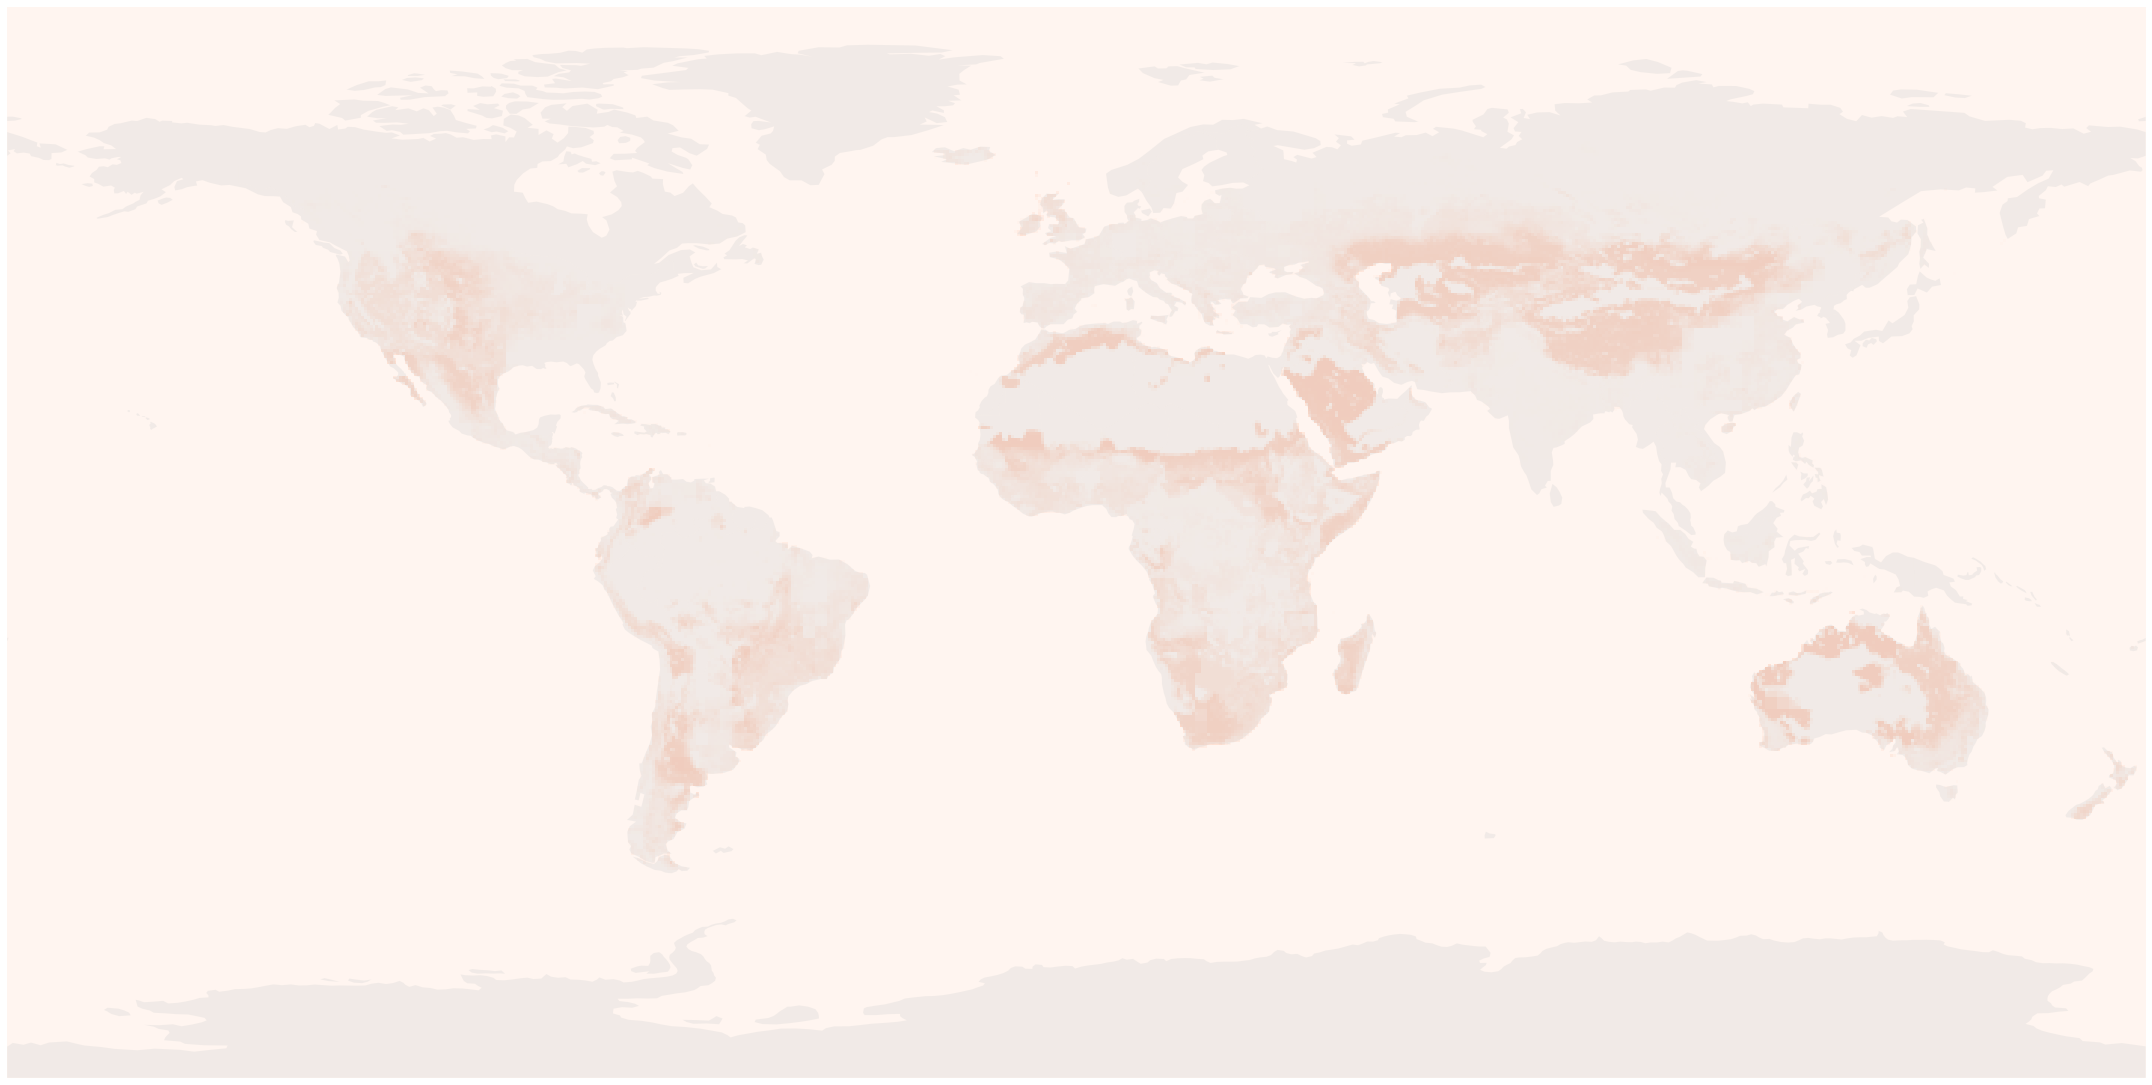

In [60]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
from matplotlib.colors import ListedColormap
import cartopy.feature as cfeature

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)

# Subset the dataset for time=35 (year 2050)
da_landuse_2050 = da_landuse.isel(time=35)

# Create a new variable for the sum of c3ann, c3nfx, c3per, c4ann, and c4per
sum_variable = da_landuse_2050['pastr'] + da_landuse_2050['range']
sum_variable =sum_variable.where(sum_variable > 0, 0)

fig, ax1 = plt.subplots(
    nrows=1, ncols=1, figsize=(30, 26),
    subplot_kw={'projection': ccrs.PlateCarree()},
    tight_layout=True
)

cmap = get_cmap('Reds')
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Plot the sum_variable
im = ax1.pcolormesh(
    da_landuse_2050['lon'].values, da_landuse_2050['lat'].values, sum_variable.values,
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=5  # Adjust vmin and vmax as needed
)

countries.plot(ax=ax1, color="lightgrey", zorder=1, alpha=0.3)
ax1.axis('off')



plt.show()


/scratch/local/54558292/ipykernel_101037/3019606522.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Reds')


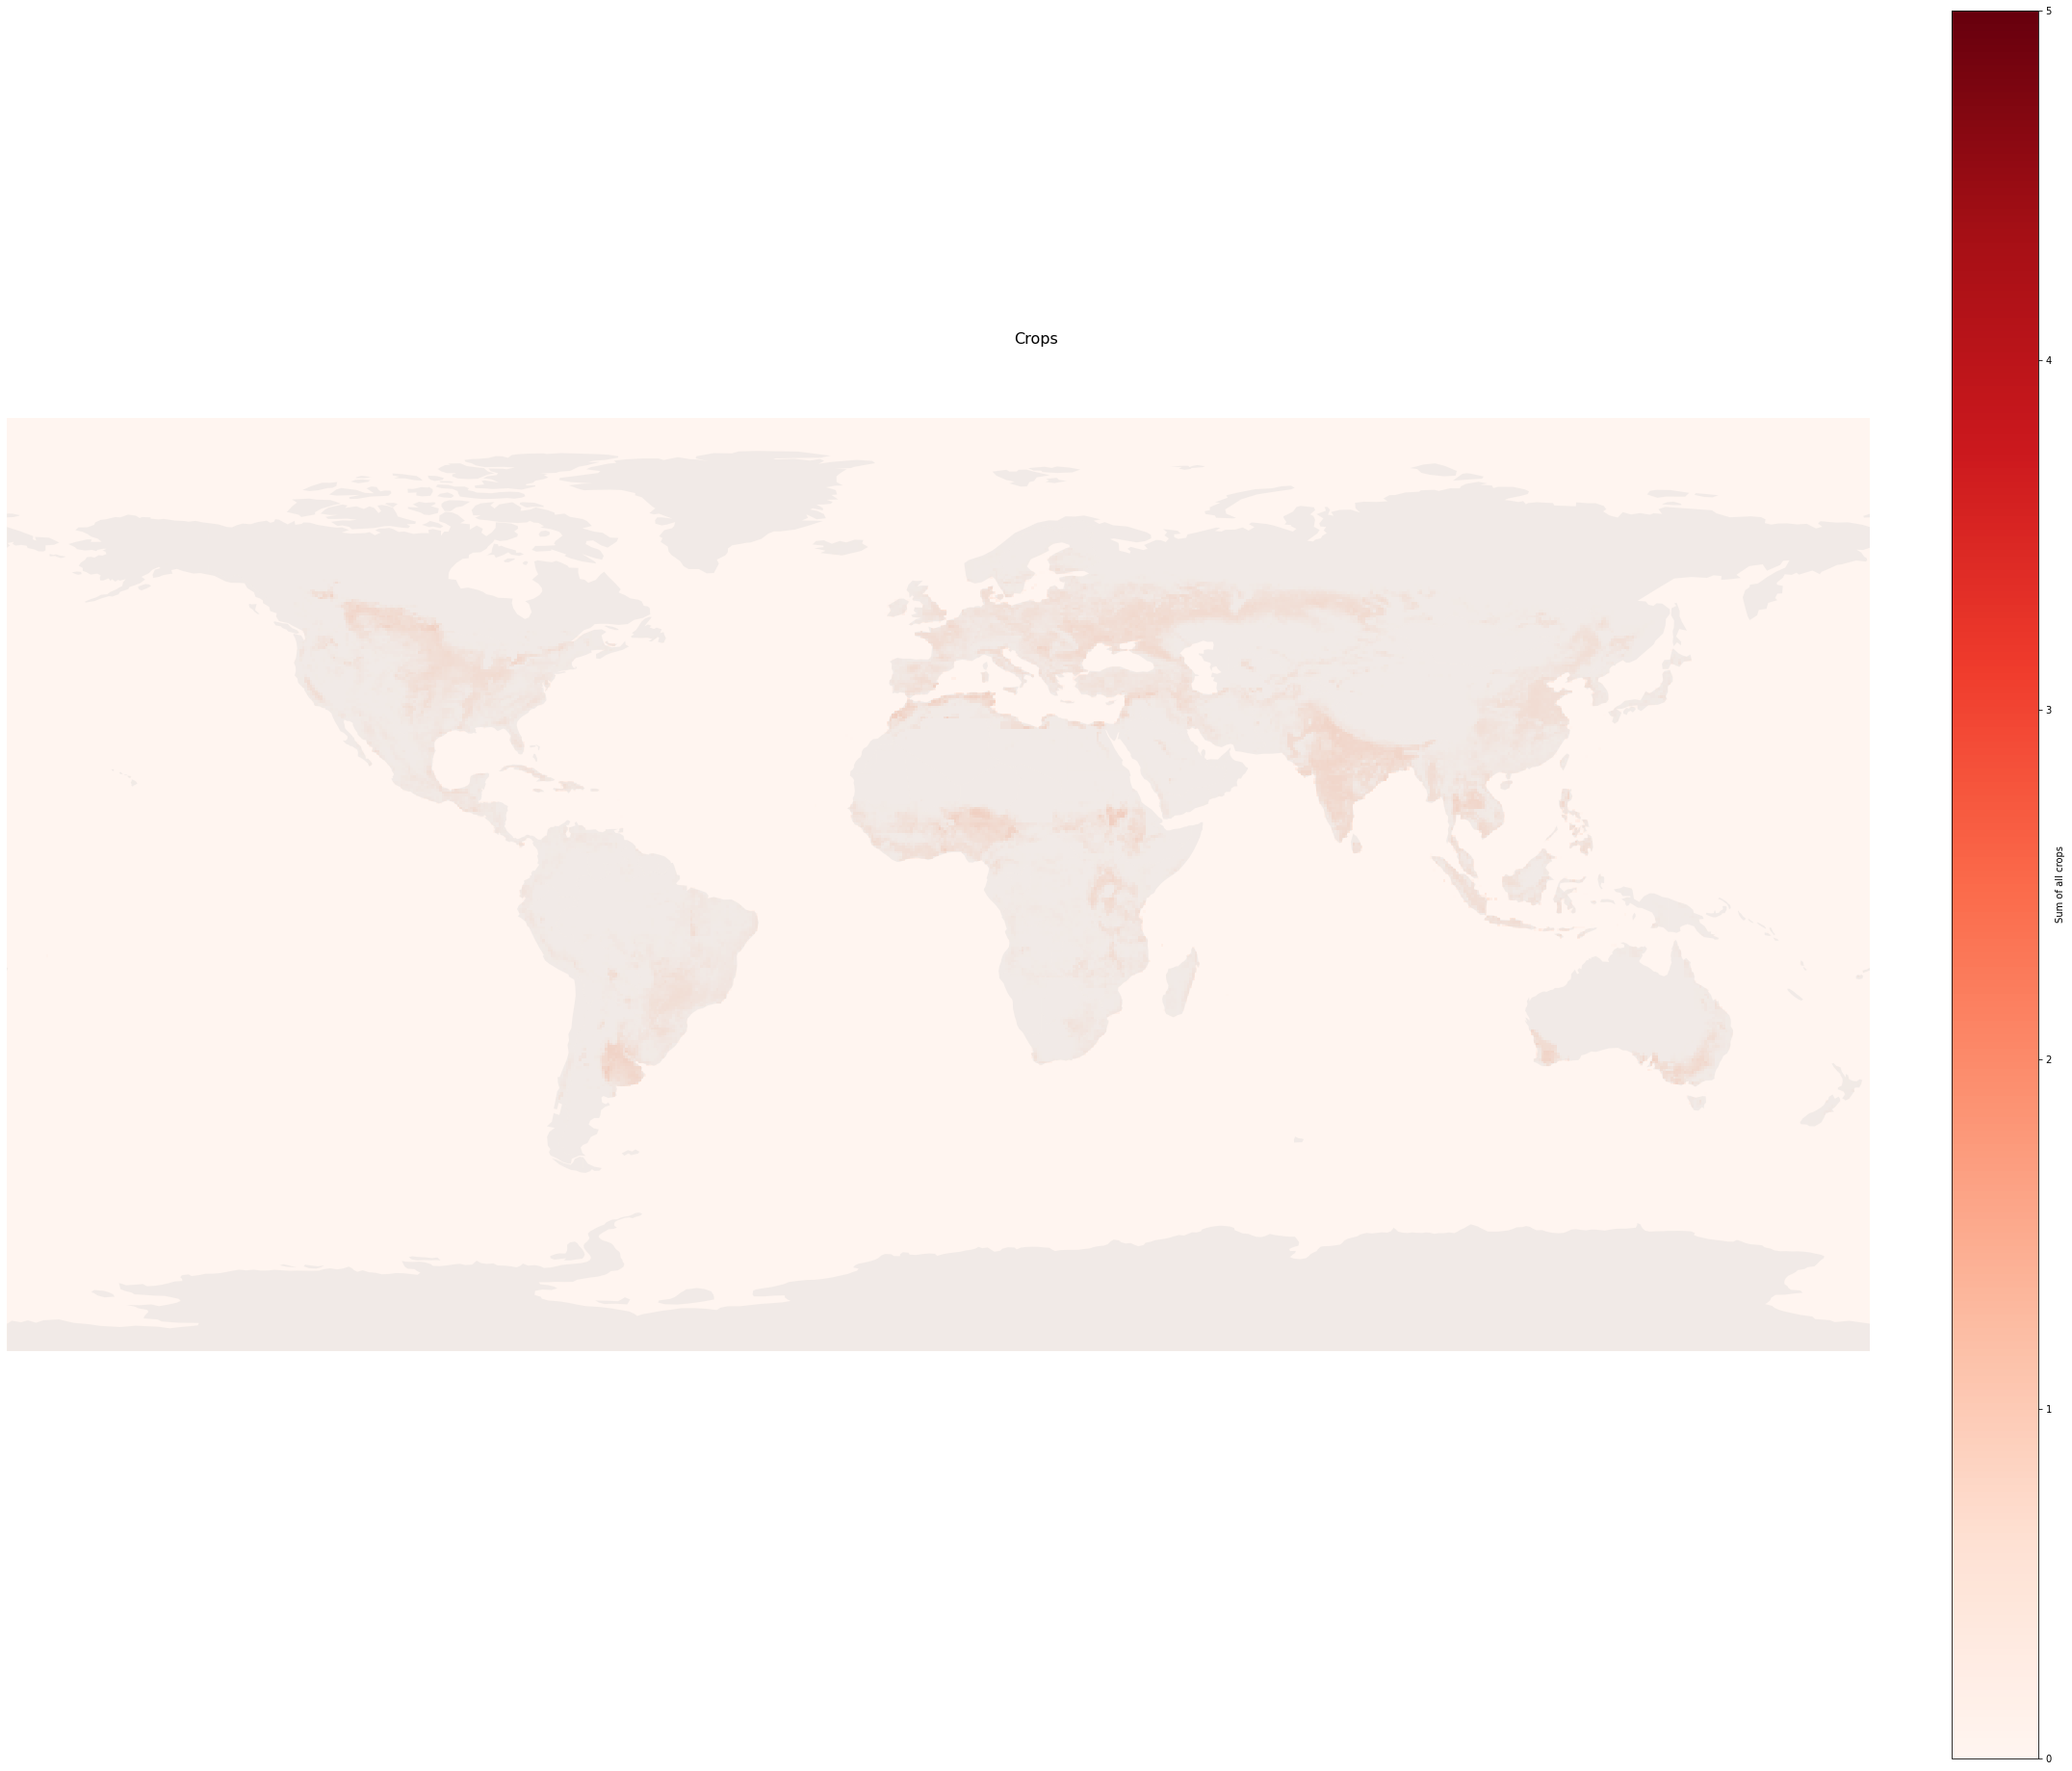

In [50]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
from matplotlib.colors import ListedColormap, Normalize
import cartopy.feature as cfeature

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)

# Subset the dataset for time=35 (year 2050)
da_landuse_2050 = da_landuse.isel(time=35)

# Create binary variables
c3ann_binary = da_landuse_2050['c3ann'].where(da_landuse_2050['c3ann'] > 0, 0)
c3nfx_binary = da_landuse_2050['c3nfx'].where(da_landuse_2050['c3nfx'] > 0, 0)
c3per_binary = da_landuse_2050['c3per'].where(da_landuse_2050['c3per'] > 0, 0)
c4ann_binary = da_landuse_2050['c4ann'].where(da_landuse_2050['c4ann'] > 0, 0)
c4per_binary = da_landuse_2050['c4per'].where(da_landuse_2050['c4per'] > 0, 0)

# Create the sum variable
sum_variable = c3ann_binary + c3nfx_binary + c3per_binary + c4ann_binary + c4per_binary

fig, ax1 = plt.subplots(
    nrows=1, ncols=1, figsize=(30, 26),
    subplot_kw={'projection': ccrs.PlateCarree()},
    tight_layout=True
)

cmap = get_cmap('Reds')
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Plot the sum_variable
im = ax1.pcolormesh(
    da_landuse_2050['lon'].values, da_landuse_2050['lat'].values, sum_variable.values,
    transform=ccrs.PlateCarree(), cmap=cmap, norm=Normalize(vmin=0, vmax=5)
)

countries.plot(ax=ax1, color="lightgrey", zorder=1, alpha=0.3)
ax1.axis('off')

# Add a colorbar
cbar = plt.colorbar(im, ax=ax1, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Sum of all crops')

plt.suptitle("Crops", y=0.8, size=16)

plt.show()


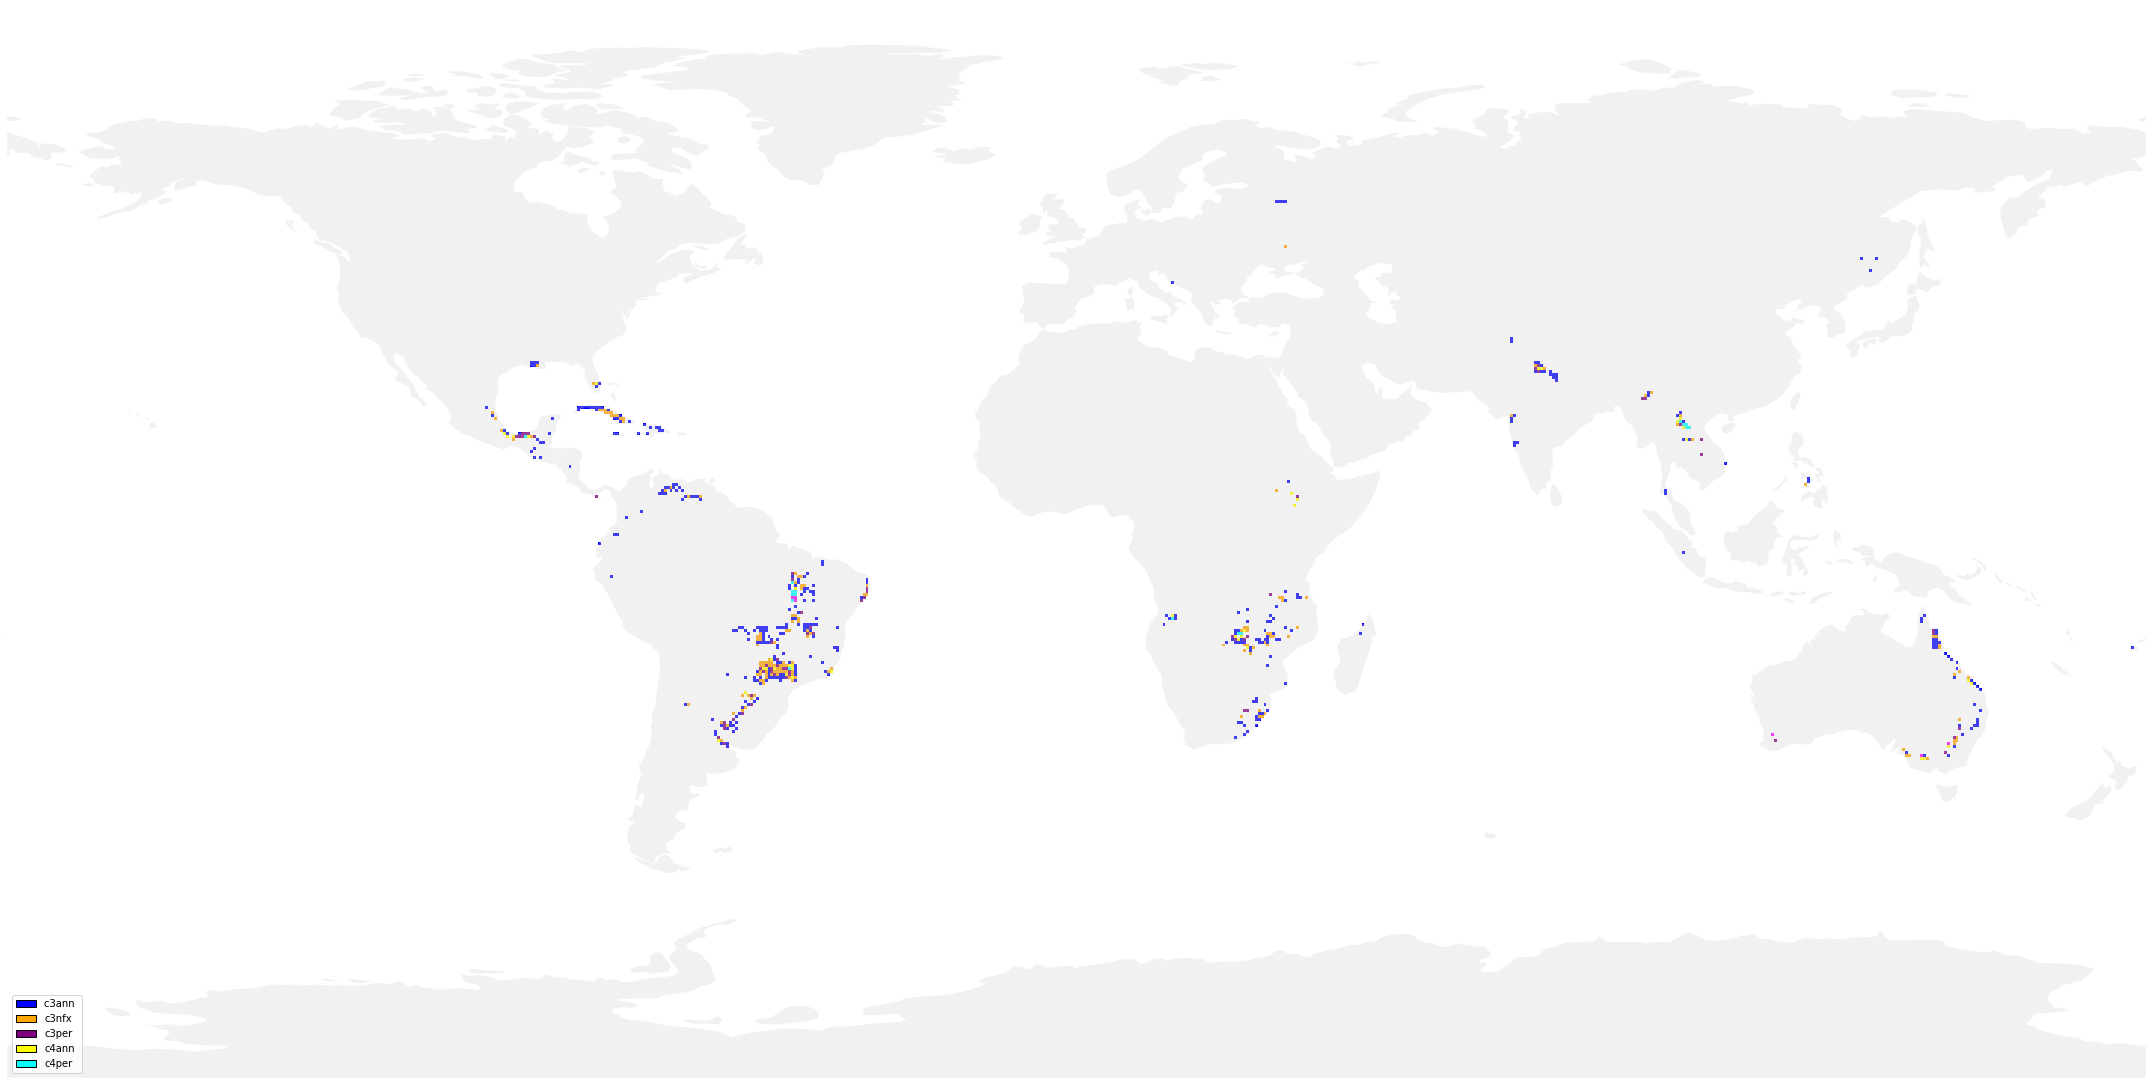

In [20]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
from matplotlib.colors import ListedColormap
import cartopy.feature as cfeature

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)

# Subset the dataset for time=35 (year 2050)
da_landuse_2050 = da_landuse.isel(time=35)

fig, ax1 = plt.subplots(
    nrows=1, ncols=1, figsize=(30, 26),
    subplot_kw={'projection': ccrs.PlateCarree()},
    tight_layout=True
)

cmap = ListedColormap(['white','blue', 'orange', 'purple', 'yellow', 'cyan',
                       'magenta', 'brown', 'lime', 'pink', 'teal', 'olive', 'gray'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Subset and plot each variable individually

# Subset and plot additional variables (add more as needed)
c3ann_masked = da_landuse_2050['c3ann']
im3 = ax1.pcolormesh(
    da_landuse_2050['lon'].values, da_landuse_2050['lat'].values, c3ann_masked.values,
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

# Subset and plot additional variables
c3nfx_masked = da_landuse_2050['c3nfx']
im4 = ax1.pcolormesh(
    da_landuse_2050['lon'].values, da_landuse_2050['lat'].values, c3nfx_masked.values,
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

c3per_masked = da_landuse_2050['c3per']
im5 = ax1.pcolormesh(
    da_landuse_2050['lon'].values, da_landuse_2050['lat'].values, c3per_masked.values,
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

c4ann_masked = da_landuse_2050['c4ann']
im6 = ax1.pcolormesh(
    da_landuse_2050['lon'].values, da_landuse_2050['lat'].values, c4ann_masked.values,
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

c4per_masked = da_landuse_2050['c4per']
im7 = ax1.pcolormesh(
    da_landuse_2050['lon'].values, da_landuse_2050['lat'].values, c4per_masked.values,
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)


# Continue with the remaining variables...

countries.plot(ax=ax1, color="lightgrey", zorder=1, alpha=0.3)
ax1.axis('off')

# Add a legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor='blue', edgecolor='black', label='c3ann '),
    # Add more legend elements for each variable
    plt.Rectangle((0, 0), 1, 1, facecolor='orange', edgecolor='black', label='c3nfx'),
    plt.Rectangle((0, 0), 1, 1, facecolor='purple', edgecolor='black', label='c3per' ),
    plt.Rectangle((0, 0), 1, 1, facecolor='yellow', edgecolor='black', label='c4ann'),
    plt.Rectangle((0, 0), 1, 1, facecolor='cyan', edgecolor='black', label='c4per')

]

ax1.legend(handles=legend_elements, loc='lower left')

plt.show()



In [ ]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
from matplotlib.colors import ListedColormap
import cartopy.feature as cfeature

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)

# Subset the dataset for time=35 (year 2050)
da_landuse_2050 = da_landuse.isel(time=35)

fig, ax1 = plt.subplots(
    nrows=1, ncols=1, figsize=(30, 26),
    subplot_kw={'projection': ccrs.PlateCarree()},
    tight_layout=True
)

cmap = ListedColormap(['white', 'green', 'red', 'blue', 'orange', 'purple', 'yellow', 'cyan',
                       'magenta', 'brown', 'lime', 'pink', 'teal', 'olive', 'gray'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Subset and plot each variable individually
primf_masked = da_landuse_2050['primf'].where(da_landuse_2050['primf'] > 0, 0)
im1 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], primf_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

secdf_masked = da_landuse_2050['secdf'].where(da_landuse_2050['secdf'] > 0, 0)
im2 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], secdf_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

# Subset and plot additional variables (add more as needed)
c3ann_masked = da_landuse_2050['c3ann'].where(da_landuse_2050['c3ann'] > 0, 0)
im3 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], c3ann_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

# Subset and plot additional variables
c3nfx_masked = da_landuse_2050['c3nfx'].where(da_landuse_2050['c3nfx'] > 0, 0)
im4 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], c3nfx_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

c3per_masked = da_landuse_2050['c3per'].where(da_landuse_2050['c3per'] > 0, 0)
im5 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], c3per_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

c4ann_masked = da_landuse_2050['c4ann'].where(da_landuse_2050['c4ann'] > 0, 0)
im6 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], c4ann_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

c4per_masked = da_landuse_2050['c4per'].where(da_landuse_2050['c4per'] > 0, 0)
im7 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], c4per_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

pastr_masked = da_landuse_2050['pastr'].where(da_landuse_2050['pastr'] > 0, 0)
im8 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], pastr_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

primn_masked = da_landuse_2050['primn'].where(da_landuse_2050['primn'] > 0, 0)
im9 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], primn_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

range_masked = da_landuse_2050['range'].where(da_landuse_2050['range'] > 0, 0)
im10 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], range_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)
secdm_masked = da_landuse_2050['secdm'].where(da_landuse_2050['secdm'] > 0, 0)
im11 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], secdm_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

secma_masked = da_landuse_2050['secma'].where(da_landuse_2050['secma'] > 0, 0)
im12 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], secdo_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)




urban_masked = da_landuse_2050['urban'].where(da_landuse_2050['urban'] > 0, 0)
im15 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], urban_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)


# Continue with the remaining variables...

countries.plot(ax=ax1, color="lightgrey", zorder=1, alpha=0.3)
ax1.axis('off')

# Add a legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor='blue', edgecolor='black', label='c3ann > 0'),
    # Add more legend elements for each variable
    plt.Rectangle((0, 0), 1, 1, facecolor='orange', edgecolor='black', label='c3nfx > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='purple', edgecolor='black', label='c3per > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='yellow', edgecolor='black', label='c4ann > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='cyan', edgecolor='black', label='c4per > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='magenta', edgecolor='black', label='pastr > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='brown', edgecolor='black', label='primn > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='lime', edgecolor='black', label='range > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='pink', edgecolor='black', label='secdn > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='teal', edgecolor='black', label='secma > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='olive', edgecolor='black', label='secmb > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='gray', edgecolor='black', label='urban > 0')
]

ax1.legend(handles=legend_elements, loc='lower left')

plt.show()



KeyError: 'secdm'

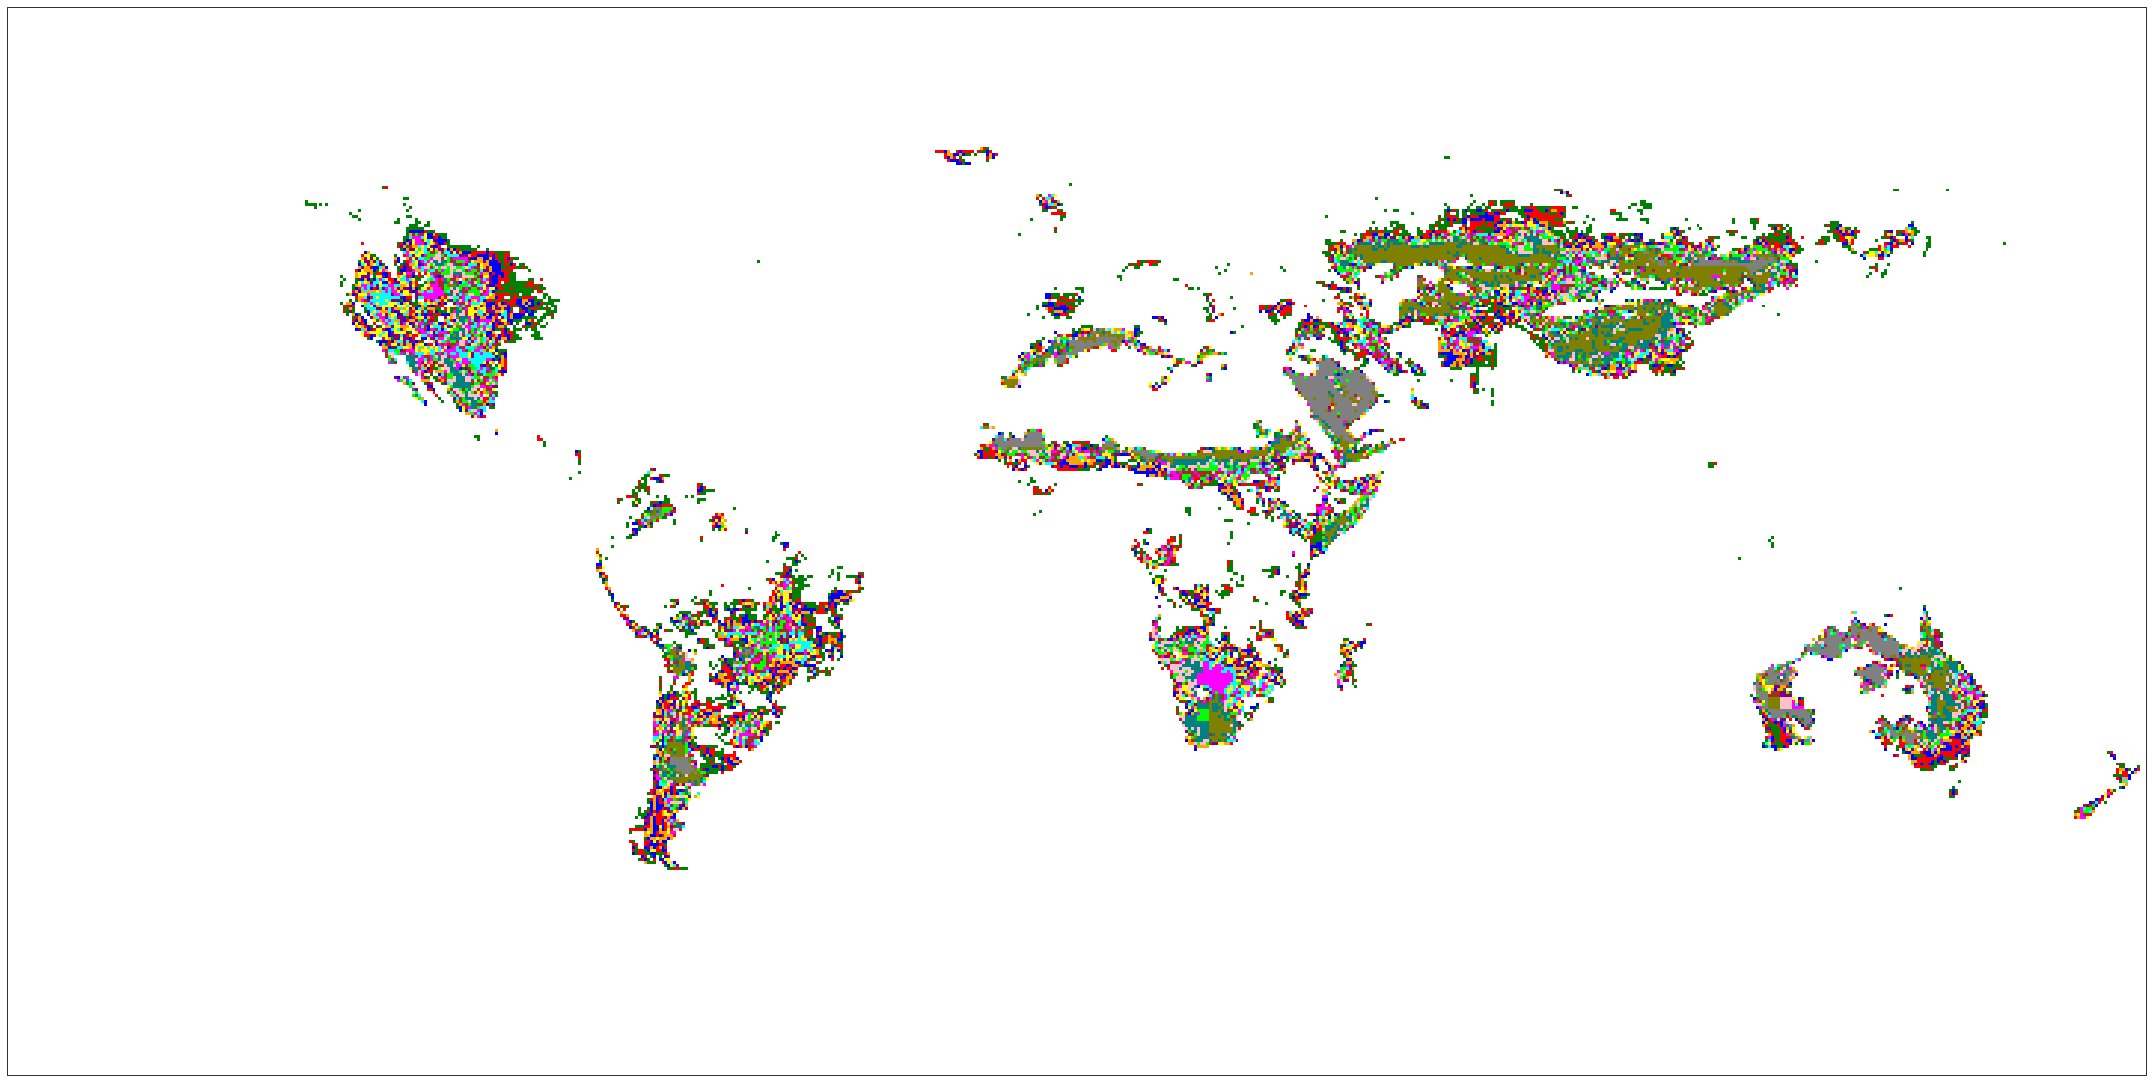

In [186]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import geopandas as gpd
from matplotlib.colors import ListedColormap
import cartopy.feature as cfeature

# Load the land use dataset
ncfname = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_" + "ssp126" + ".nc"
da_landuse = xr.open_dataset(ncfname, decode_times=False)

# Subset the dataset for time=35 (year 2050)
da_landuse_2050 = da_landuse.isel(time=35)

fig, ax1 = plt.subplots(
    nrows=1, ncols=1, figsize=(30, 26),
    subplot_kw={'projection': ccrs.PlateCarree()},
    tight_layout=True
)

cmap = ListedColormap(['white', 'green', 'red', 'blue', 'orange', 'purple', 'yellow', 'cyan',
                       'magenta', 'brown', 'lime', 'pink', 'teal', 'olive', 'gray'])
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Subset and plot each variable individually
primf_masked = da_landuse_2050['primf'].where(da_landuse_2050['primf'] > 0, 0)
im1 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], primf_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

secdf_masked = da_landuse_2050['secdf'].where(da_landuse_2050['secdf'] > 0, 0)
im2 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], secdf_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

# Subset and plot additional variables (add more as needed)
c3ann_masked = da_landuse_2050['c3ann'].where(da_landuse_2050['c3ann'] > 0, 0)
im3 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], c3ann_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

# Subset and plot additional variables
c3nfx_masked = da_landuse_2050['c3nfx'].where(da_landuse_2050['c3nfx'] > 0, 0)
im4 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], c3nfx_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

c3per_masked = da_landuse_2050['c3per'].where(da_landuse_2050['c3per'] > 0, 0)
im5 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], c3per_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

c4ann_masked = da_landuse_2050['c4ann'].where(da_landuse_2050['c4ann'] > 0, 0)
im6 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], c4ann_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

c4per_masked = da_landuse_2050['c4per'].where(da_landuse_2050['c4per'] > 0, 0)
im7 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], c4per_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

pastr_masked = da_landuse_2050['pastr'].where(da_landuse_2050['pastr'] > 0, 0)
im8 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], pastr_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

primn_masked = da_landuse_2050['primn'].where(da_landuse_2050['primn'] > 0, 0)
im9 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], primn_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

range_masked = da_landuse_2050['range'].where(da_landuse_2050['range'] > 0, 0)
im10 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], range_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)
secdm_masked = da_landuse_2050['secdm'].where(da_landuse_2050['secdm'] > 0, 0)
im11 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], secdm_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)

secma_masked = da_landuse_2050['secma'].where(da_landuse_2050['secma'] > 0, 0)
im12 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], secdo_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)




urban_masked = da_landuse_2050['urban'].where(da_landuse_2050['urban'] > 0, 0)
im15 = ax1.pcolormesh(
    da_landuse_2050['lon'].values[:-1], da_landuse_2050['lat'].values[:-1], urban_masked.values[:-1, :-1],
    transform=ccrs.PlateCarree(), cmap=cmap, vmin=0, vmax=1
)


# Continue with the remaining variables...

countries.plot(ax=ax1, color="lightgrey", zorder=1, alpha=0.3)
ax1.axis('off')

# Add a legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor='green', edgecolor='black', label='primf > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='red', edgecolor='black', label='secdf > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='blue', edgecolor='black', label='c3ann > 0'),
    # Add more legend elements for each variable
    plt.Rectangle((0, 0), 1, 1, facecolor='orange', edgecolor='black', label='c3nfx > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='purple', edgecolor='black', label='c3per > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='yellow', edgecolor='black', label='c4ann > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='cyan', edgecolor='black', label='c4per > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='magenta', edgecolor='black', label='pastr > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='brown', edgecolor='black', label='primn > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='lime', edgecolor='black', label='range > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='pink', edgecolor='black', label='secdn > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='teal', edgecolor='black', label='secma > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='olive', edgecolor='black', label='secmb > 0'),
    plt.Rectangle((0, 0), 1, 1, facecolor='gray', edgecolor='black', label='urban > 0')
]

ax1.legend(handles=legend_elements, loc='lower left')

plt.show()

